In [1]:
import os
import glob
import pandas as pd
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

import tensorflow as tf
import os
import pandas as pd
import numpy as np

/var/folders/wk/mt802m5j25xbcsqpcns7tl980000gn/T/ipykernel_92465/3764757689.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
df = pd.read_csv('combine_hourly.csv')
df = df.iloc[:,1:]
df

open_time    open     low    high   close      volume  \
0     2021-11-30 20:00:00  0.2159  0.2143  0.2189  0.2151  40983481.0   
1     2021-11-30 21:00:00  0.2151  0.2145  0.2168  0.2163  15819679.0   
2     2021-11-30 22:00:00  0.2162  0.2146  0.2167  0.2161  25971589.0   
3     2021-11-30 23:00:00  0.2162  0.2143  0.2162  0.2151  27280328.0   
4     2021-12-01 00:00:00  0.2151  0.2124  0.2153  0.2136  35810684.0   
...                   ...     ...     ...     ...     ...         ...   
2898  2022-03-31 15:00:00  0.1395  0.1380  0.1396  0.1381  31451318.0   
2899  2022-03-31 16:00:00  0.1381  0.1380  0.1396  0.1395  33492651.0   
2900  2022-03-31 17:00:00  0.1394  0.1389  0.1397  0.1392  14805957.0   
2901  2022-03-31 18:00:00  0.1391  0.1381  0.1393  0.1392  17736121.0   
2902  2022-03-31 19:00:00  0.1392  0.1359  0.1393  0.1381  59144016.0   

      ReplyCount  RetweetCount  LikeCount  score_TextBlob  negscore_NLTK  \
0       1.852740      2.363014  12.883562        0.110067       0.025825   
1       1.947183      3.056338  12.538732        0.138010       0.026641   
2       2.138776      2.130612  10.195918        0.134883       0.020910   
3       0.553506      0.867159   2.664207        0.168896       0.014941   
4       5.177778      2.991111  12.564444        0.157265       0.022956   
...          ...           ...        ...             ...            ...   
2898    0.668394      0.735751   3.601036        0.079944       0.027259   
2899    0.643979      0.654450   3.057592        0.064663       0.031890   
2900    0.818182      0.721212   3.460606        0.075933       0.028152   
2901    2.628049      1.969512  12.500000        0.120576       0.027488   
2902    2.729560      2.270440   7.383648        0.047102       0.029182   

      neuscore_NLTK  posscore_NLTK  compound_NLTK  
0          0.884682       0.089497       0.181972  
1          0.873623       0.099729       0.223338  
2          0.887380       0.091702       0.219767  
3          0.892137       0.092915       0.203395  
4          0.897476       0.079564       0.175621  
...             ...            ...            ...  
2898       0.876933       0.095824       0.195424  
2899       0.907251       0.060864       0.070347  
2900       0.904006       0.067855       0.121345  
2901       0.879159       0.093372       0.164512  
2902       0.910057       0.060748       0.071765  

[2903 rows x 14 columns]

In [3]:
df.index = pd.to_datetime(df['open_time'])
df

open_time    open     low    high   close  \
open_time                                                                  
2021-11-30 20:00:00  2021-11-30 20:00:00  0.2159  0.2143  0.2189  0.2151   
2021-11-30 21:00:00  2021-11-30 21:00:00  0.2151  0.2145  0.2168  0.2163   
2021-11-30 22:00:00  2021-11-30 22:00:00  0.2162  0.2146  0.2167  0.2161   
2021-11-30 23:00:00  2021-11-30 23:00:00  0.2162  0.2143  0.2162  0.2151   
2021-12-01 00:00:00  2021-12-01 00:00:00  0.2151  0.2124  0.2153  0.2136   
...                                  ...     ...     ...     ...     ...   
2022-03-31 15:00:00  2022-03-31 15:00:00  0.1395  0.1380  0.1396  0.1381   
2022-03-31 16:00:00  2022-03-31 16:00:00  0.1381  0.1380  0.1396  0.1395   
2022-03-31 17:00:00  2022-03-31 17:00:00  0.1394  0.1389  0.1397  0.1392   
2022-03-31 18:00:00  2022-03-31 18:00:00  0.1391  0.1381  0.1393  0.1392   
2022-03-31 19:00:00  2022-03-31 19:00:00  0.1392  0.1359  0.1393  0.1381   

                         volume  ReplyCount  RetweetCount  LikeCount  \
open_time                                                              
2021-11-30 20:00:00  40983481.0    1.852740      2.363014  12.883562   
2021-11-30 21:00:00  15819679.0    1.947183      3.056338  12.538732   
2021-11-30 22:00:00  25971589.0    2.138776      2.130612  10.195918   
2021-11-30 23:00:00  27280328.0    0.553506      0.867159   2.664207   
2021-12-01 00:00:00  35810684.0    5.177778      2.991111  12.564444   
...                         ...         ...           ...        ...   
2022-03-31 15:00:00  31451318.0    0.668394      0.735751   3.601036   
2022-03-31 16:00:00  33492651.0    0.643979      0.654450   3.057592   
2022-03-31 17:00:00  14805957.0    0.818182      0.721212   3.460606   
2022-03-31 18:00:00  17736121.0    2.628049      1.969512  12.500000   
2022-03-31 19:00:00  59144016.0    2.729560      2.270440   7.383648   

                     score_TextBlob  negscore_NLTK  neuscore_NLTK  \
open_time                                                           
2021-11-30 20:00:00        0.110067       0.025825       0.884682   
2021-11-30 21:00:00        0.138010       0.026641       0.873623   
2021-11-30 22:00:00        0.134883       0.020910       0.887380   
2021-11-30 23:00:00        0.168896       0.014941       0.892137   
2021-12-01 00:00:00        0.157265       0.022956       0.897476   
...                             ...            ...            ...   
2022-03-31 15:00:00        0.079944       0.027259       0.876933   
2022-03-31 16:00:00        0.064663       0.031890       0.907251   
2022-03-31 17:00:00        0.075933       0.028152       0.904006   
2022-03-31 18:00:00        0.120576       0.027488       0.879159   
2022-03-31 19:00:00        0.047102       0.029182       0.910057   

                     posscore_NLTK  compound_NLTK  
open_time                                          
2021-11-30 20:00:00       0.089497       0.181972  
2021-11-30 21:00:00       0.099729       0.223338  
2021-11-30 22:00:00       0.091702       0.219767  
2021-11-30 23:00:00       0.092915       0.203395  
2021-12-01 00:00:00       0.079564       0.175621  
...                            ...            ...  
2022-03-31 15:00:00       0.095824       0.195424  
2022-03-31 16:00:00       0.060864       0.070347  
2022-03-31 17:00:00       0.067855       0.121345  
2022-03-31 18:00:00       0.093372       0.164512  
2022-03-31 19:00:00       0.060748       0.071765  

[2903 rows x 14 columns]

In [4]:
temp = df['close']
temp[temp.isnull()]

Series([], Name: close, dtype: float64)

In [6]:
def df_to_X_y(df, window_size):
    #convert dataframe into numpy array
    df_as_np = df.to_numpy()
    # start X as list bumping into a [[[1], [2], [3], [4], [5]]] first 5 value 
    # Y [6]
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
    # row = df_as_np[i:i+5]
    # add list [[a]]  > so that each value becomes [[1]]
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        #label = df_as_np[i+5]
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
# X [[[1], [2], [3]]] Y [4]
# X [[[2], [3], [4]]] Y [5]
# X [[[3], [4], [5]]] Y [6]


In [7]:
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
print(X1.shape, y1.shape)

X1.shape[0]*.4

(2900, 3, 1) (2900,)


1160.0

In [8]:
#df[2030:]

In [9]:
#X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X_train1, y_train1 = X1[:1160], y1[:1160]
X_val1, y_val1 = X1[1160:2030], y1[1160:2030]
X_test1, y_test1 = X1[2030:], y1[2030:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((1160, 3, 1), (1160,), (870, 3, 1), (870,), (870, 3, 1), (870,))

In [48]:
test = pd.DataFrame(y_test1)
test[test[0].isnull()]

0
420 NaN

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
# make sequential model 
model1 = Sequential()
# specify input layer ( 5,1 the shape of X)
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dropout(0.5))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 64)                16896     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [40]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
# if the learning_rate number becomes larger, the speed of model is quicker, but it is harder to get maximum
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])


Epoch 1/10
 1/37 [..............................] - ETA: 18s - loss: 0.0297 - root_mean_squared_error: 0.1724

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


37/37 [==============================] - 2s 37ms/step - loss: 0.0028 - root_mean_squared_error: 0.0526 - val_loss: 3.4367e-04 - val_root_mean_squared_error: 0.0185
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 2.1915e-04 - root_mean_squared_error: 0.0148 - val_loss: 8.1446e-04 - val_root_mean_squared_error: 0.0285
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 1.9343e-04 - root_mean_squared_error: 0.0139 - val_loss: 8.2781e-04 - val_root_mean_squared_error: 0.0288
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 1.7108e-04 - root_mean_squared_error: 0.0131 - val_loss: 5.1828e-04 - val_root_mean_squared_error: 0.0228
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 1.5142e-04 - root_mean_squared_error: 0.0123 - val_loss: 4.4523e-04 - val_root_mean_squared_error: 0.0211
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 1.3627e-04 - root_mean_squared_error: 0.0117 - val_l

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


37/37 [==============================] - 1s 28ms/step - loss: 8.5704e-05 - root_mean_squared_error: 0.0093 - val_loss: 2.7177e-04 - val_root_mean_squared_error: 0.0165
Epoch 8/10
 1/37 [..............................] - ETA: 0s - loss: 5.9237e-05 - root_mean_squared_error: 0.0077

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


37/37 [==============================] - 1s 32ms/step - loss: 6.1306e-05 - root_mean_squared_error: 0.0078 - val_loss: 3.0897e-05 - val_root_mean_squared_error: 0.0056
Epoch 9/10
 1/37 [..............................] - ETA: 0s - loss: 1.1283e-05 - root_mean_squared_error: 0.0034

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


37/37 [==============================] - 1s 27ms/step - loss: 2.8579e-05 - root_mean_squared_error: 0.0053 - val_loss: 5.3630e-06 - val_root_mean_squared_error: 0.0023
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 2.3392e-05 - root_mean_squared_error: 0.0048 - val_loss: 2.3366e-05 - val_root_mean_squared_error: 0.0048


In [13]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [14]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] =200

from sklearn.metrics import mean_squared_error as mse
def plot_predictions1(model, X, y,start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 2)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction along with hitorical price',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

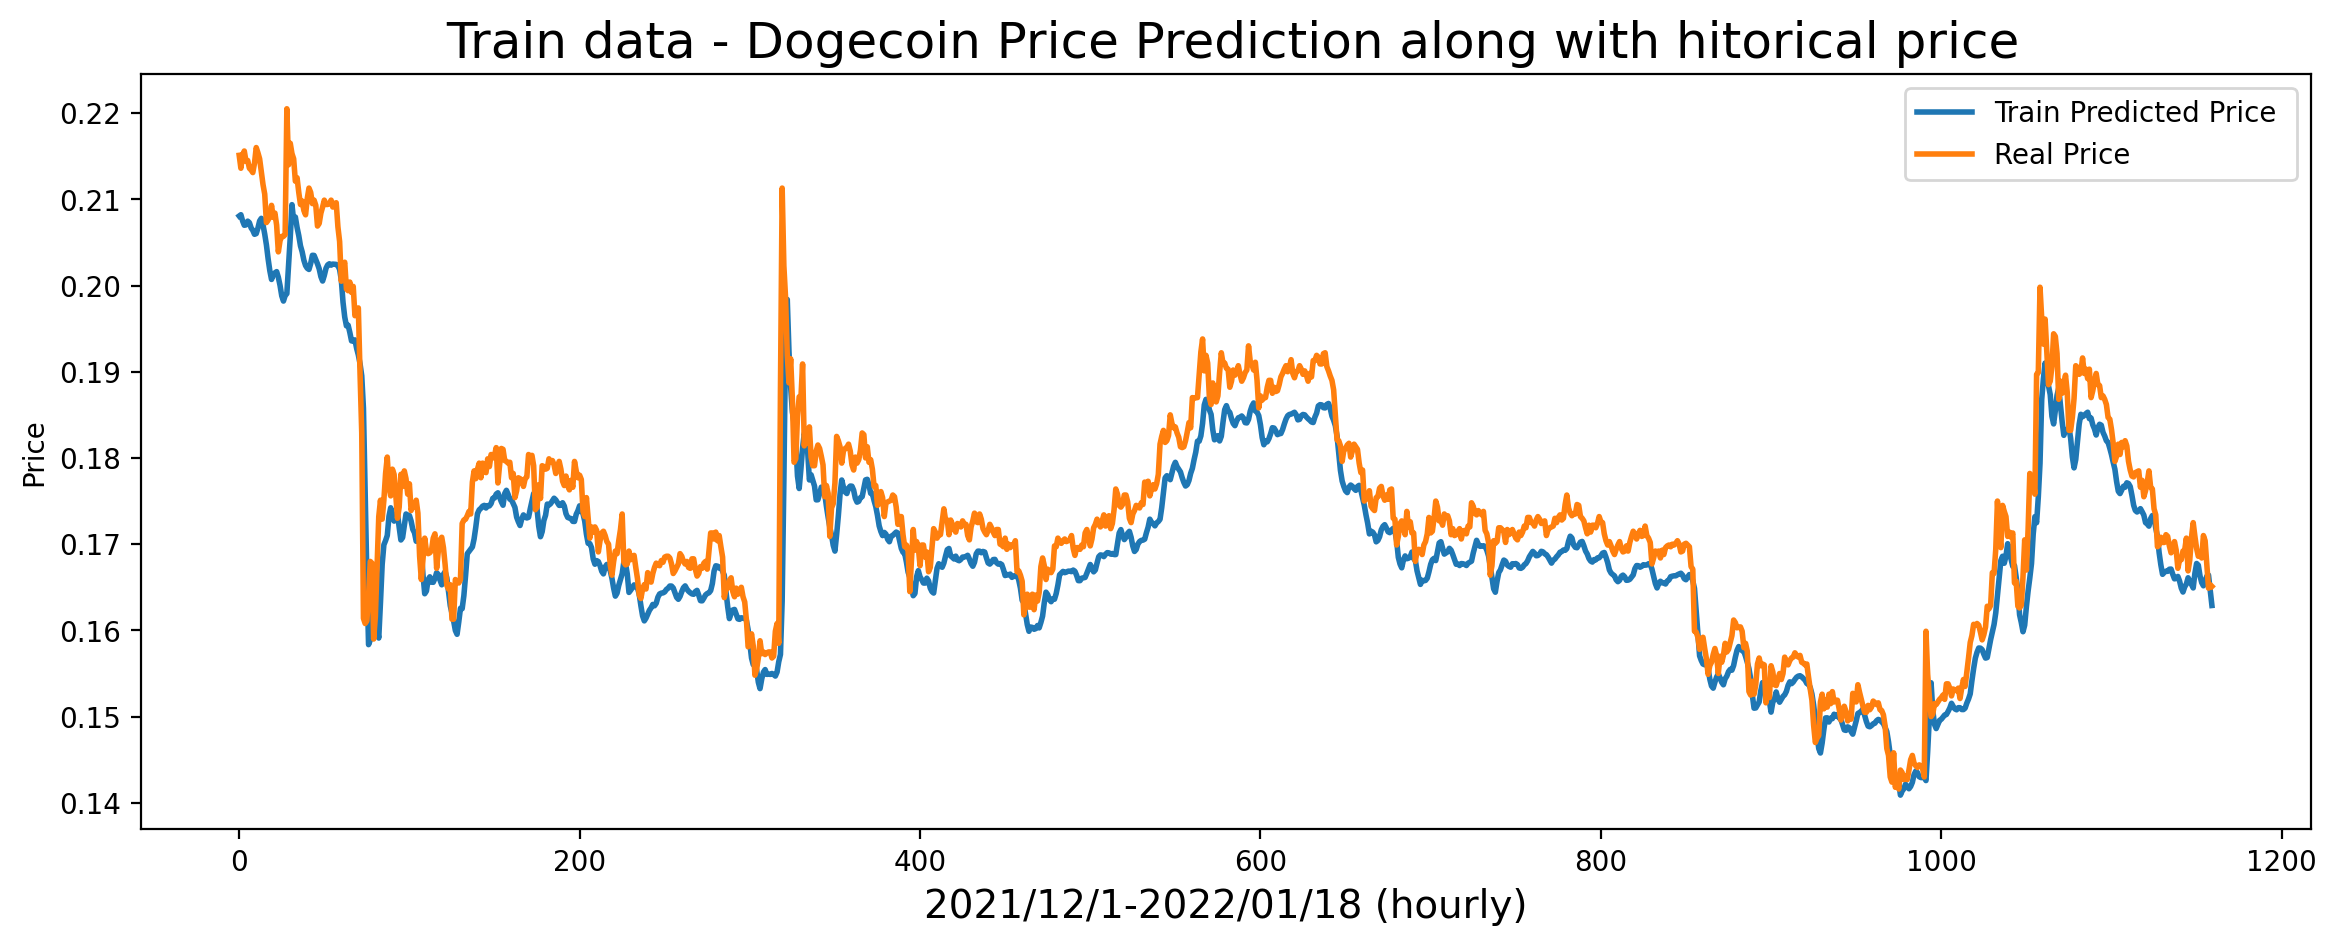

0.00493185820074878

In [15]:
plot_predictions1(model1,X_train1,y_train1)

In [16]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results['diff'] = test_results['Test Predictions'] - test_results['Actuals']
test_results ['diff'] = 

SyntaxError: invalid syntax (1470842110.py, line 4)

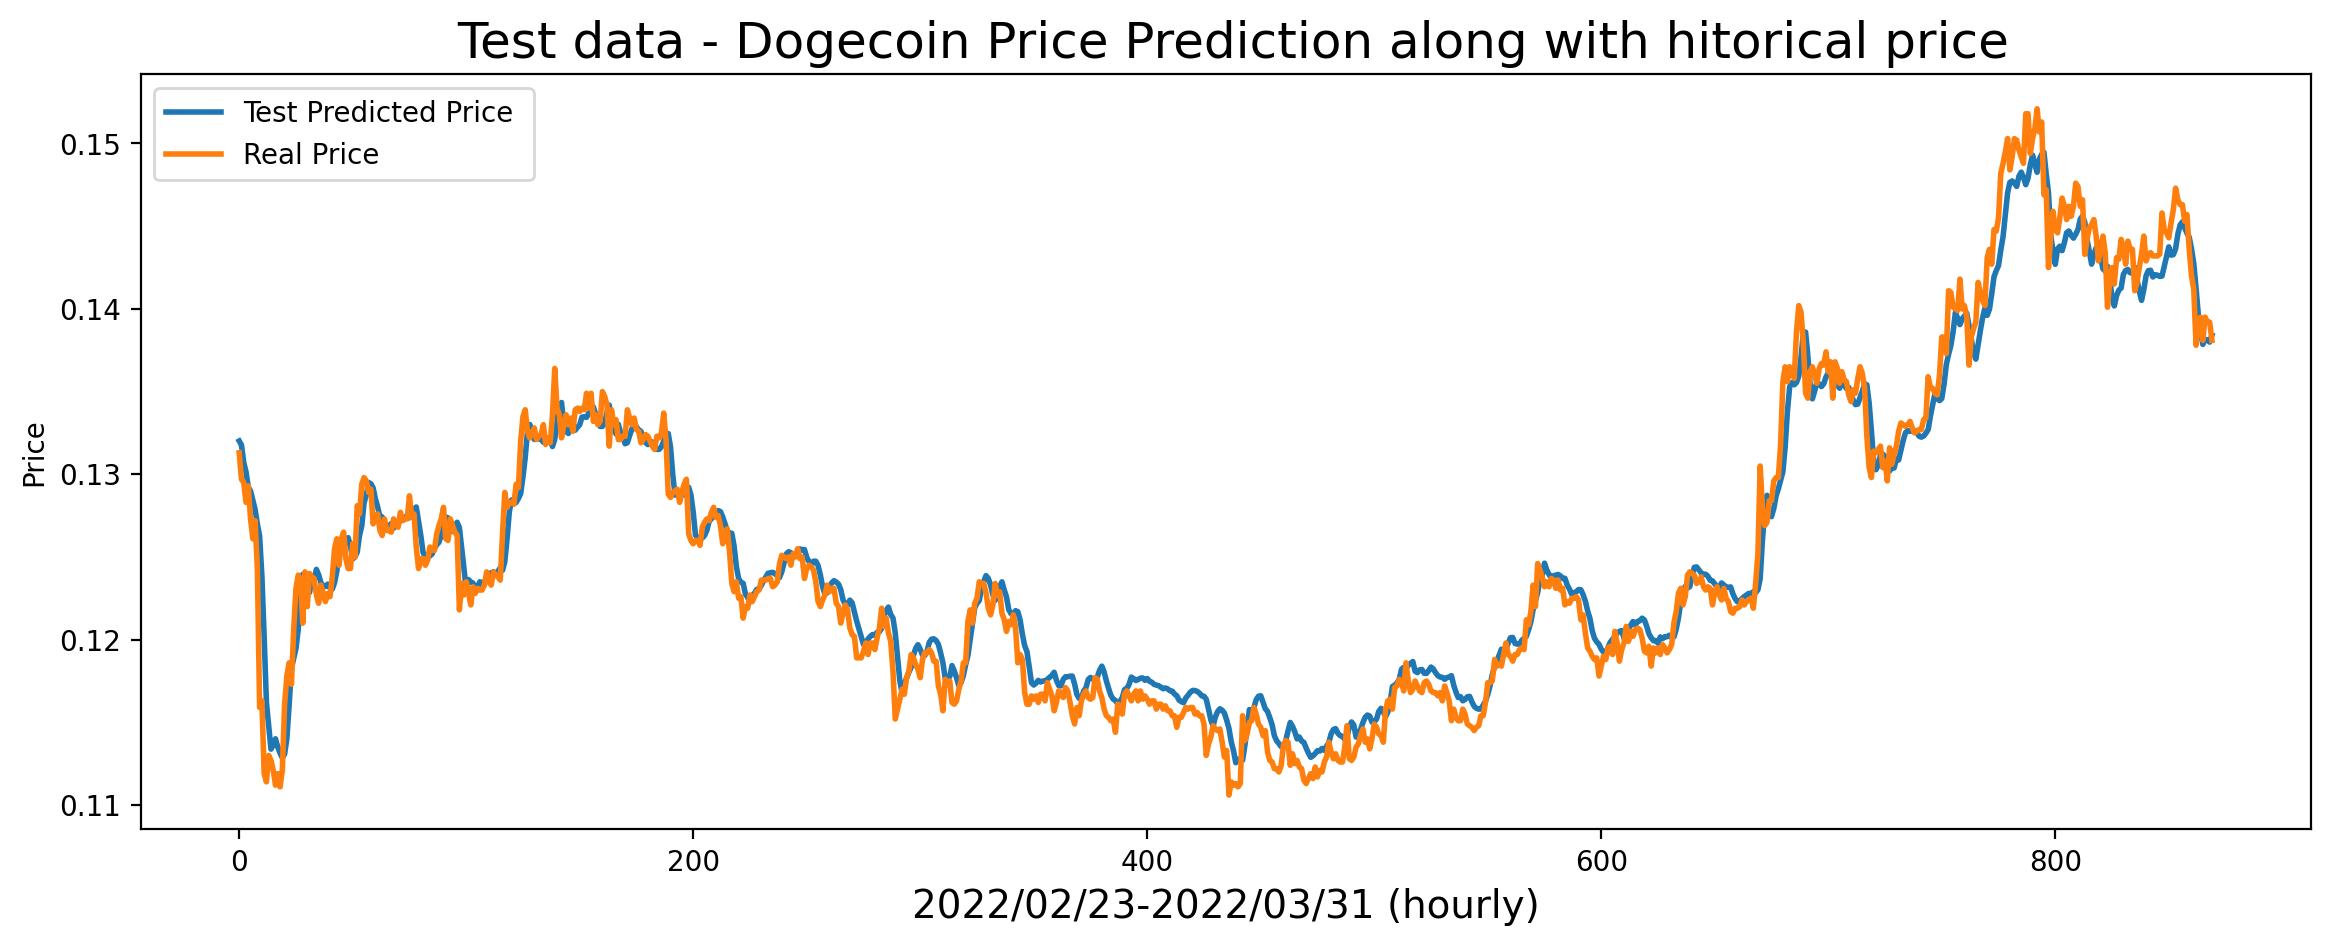

0.0015967798902872434

In [17]:
# Test
plot_predictions1(model1,X_test1,y_test1,partofdata = 'Test')

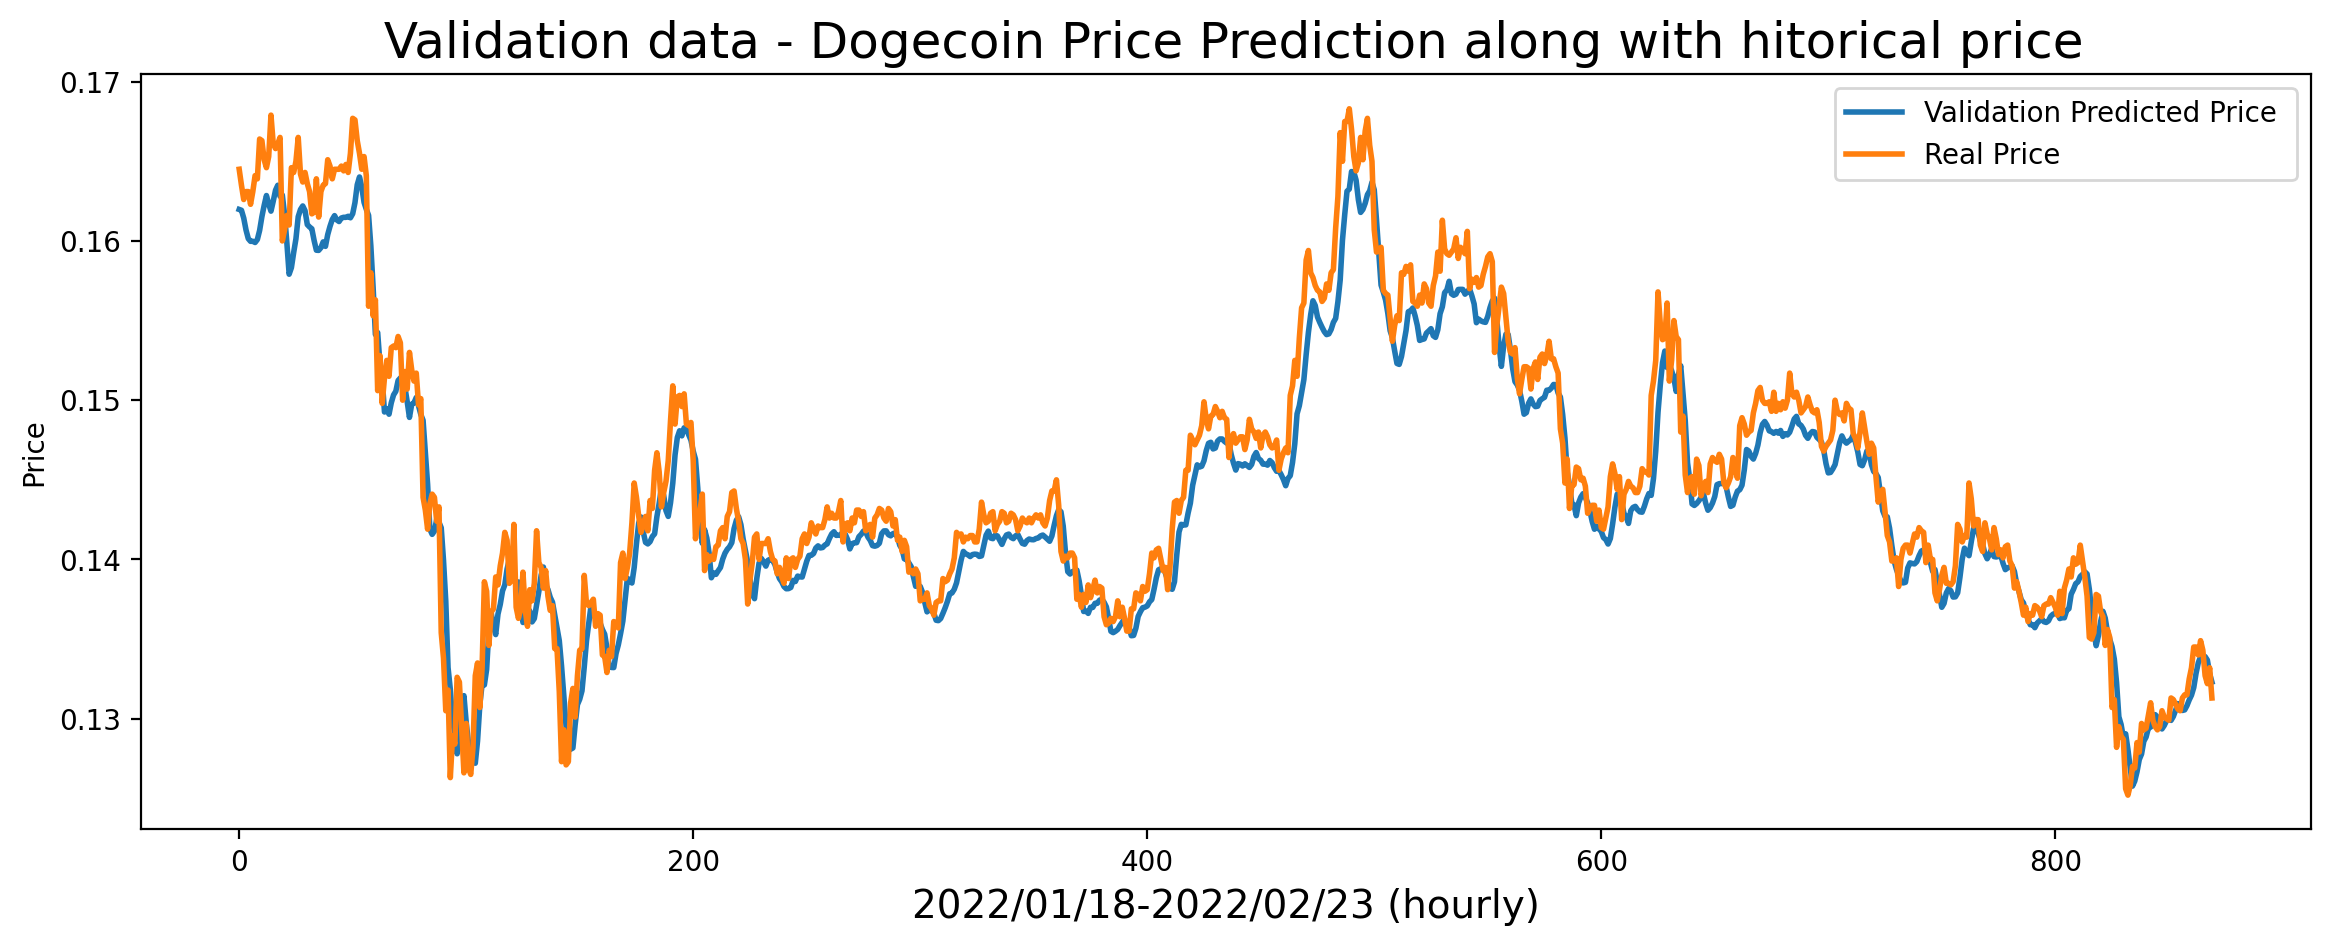

0.0023070083530001397

In [18]:
plot_predictions1(model1,X_val1,y_val1,partofdata='Validation')

In [115]:
temp = df['score_TextBlob']
X6, y6 = df_to_X_y(temp, WINDOW_SIZE)
X6_train, y6_train = X6[:1160], y6[:1160]
X6_val, y6_val = X6[1160:2030], y6[1160:2030]
X6_test, y6_test = X6[2030:], y6[2030:]
X6_train.shape, y6_train.shape, X6_val.shape, y6_val.shape, X6_test.shape, y6_test.shape

((1160, 3, 1), (1160,), (870, 3, 1), (870,), (870, 3, 1), (870,))

# Multivariate LSTM TIME SERIES

In [19]:
temp_df = df.drop(columns=['open', 'open_time','low', 'high','volume','ReplyCount', 'RetweetCount', 'LikeCount',
                           'negscore_NLTK', 'neuscore_NLTK', 'posscore_NLTK', 'compound_NLTK'])
temp_df

close  score_TextBlob
open_time                                  
2021-11-30 20:00:00  0.2151        0.110067
2021-11-30 21:00:00  0.2163        0.138010
2021-11-30 22:00:00  0.2161        0.134883
2021-11-30 23:00:00  0.2151        0.168896
2021-12-01 00:00:00  0.2136        0.157265
...                     ...             ...
2022-03-31 15:00:00  0.1381        0.079944
2022-03-31 16:00:00  0.1395        0.064663
2022-03-31 17:00:00  0.1392        0.075933
2022-03-31 18:00:00  0.1392        0.120576
2022-03-31 19:00:00  0.1381        0.047102

[2903 rows x 2 columns]

In [20]:
# [[close1, score1],[close2, score2],[close3, score3],[close4, score4]] [close 5]
# [[close2, score2],[close3, score3],[close4, score4],[close5, score5],] [close 6]

def df_to_X_y2(df, window_size=3):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        # r is goint to be a list : all of the row value
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [21]:
X2, y2 = df_to_X_y2(temp_df)
print(X2.shape, y2.shape)
print(X2.shape[0]*0.7)

(2900, 3, 2) (2900,)
2029.9999999999998


In [22]:
X2_train, y2_train = X2[:1160], y2[:1160]
X2_val, y2_val = X2[1160:2030], y2[1160:2030]
X2_test, y2_test = X2[2030:], y2[2030:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape


((1160, 3, 2), (1160,), (870, 3, 2), (870,), (870, 3, 2), (870,))

In [23]:
temp_training_mean = np.mean(X2_train[:, :, 0])
temp_training_std = np.std(X2_train[:, :, 0])
# standardize
# textBlob already standardize
def preprocess(X):
    # first dimension is number of the rows
    # the next one is the timestamp 
    # the third one is how many feature you use 
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    
    return X

In [24]:
preprocess(X2_train)
preprocess(X2_val)
preprocess(X2_test)

array([[[-2.94637561,  0.10579307],
        [-2.87570821,  0.08527916],
        [-3.00997627,  0.06387321]],

       [[-2.87570821,  0.08527916],
        [-3.00997627,  0.06387321],
        [-3.00997627,  0.06621614]],

       [[-3.00997627,  0.06387321],
        [-3.00997627,  0.06621614],
        [-3.12304411,  0.06952414]],

       ...,

       [[-2.43050361,  0.06395557],
        [-2.52943797,  0.07994416],
        [-2.43050361,  0.06466342]],

       [[-2.52943797,  0.07994416],
        [-2.43050361,  0.06466342],
        [-2.45170383,  0.07593342]],

       [[-2.43050361,  0.06466342],
        [-2.45170383,  0.07593342],
        [-2.45170383,  0.12057564]]])

In [42]:
model2 = Sequential()
model2.add(InputLayer((3, 2)))
model2.add(LSTM(64))
model2.add(Dropout(0.5))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 64)                17152     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 8)                 520       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [43]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp2])

Epoch 1/10
 1/37 [..............................] - ETA: 18s - loss: 0.0888 - root_mean_squared_error: 0.2980

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 2s 36ms/step - loss: 0.0062 - root_mean_squared_error: 0.0790 - val_loss: 5.5200e-04 - val_root_mean_squared_error: 0.0235
Epoch 2/10
37/37 [==============================] - ETA: 0s - loss: 2.2616e-04 - root_mean_squared_error: 0.0150

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 1s 28ms/step - loss: 2.2616e-04 - root_mean_squared_error: 0.0150 - val_loss: 2.7789e-04 - val_root_mean_squared_error: 0.0167
Epoch 3/10
 1/37 [..............................] - ETA: 0s - loss: 1.3144e-04 - root_mean_squared_error: 0.0115

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 1s 32ms/step - loss: 7.9212e-05 - root_mean_squared_error: 0.0089 - val_loss: 8.0741e-05 - val_root_mean_squared_error: 0.0090
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 4.7679e-05 - root_mean_squared_error: 0.0069 - val_loss: 1.9218e-04 - val_root_mean_squared_error: 0.0139
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 2.9816e-05 - root_mean_squared_error: 0.0055 - val_loss: 9.7104e-05 - val_root_mean_squared_error: 0.0099
Epoch 6/10
 1/37 [..............................] - ETA: 0s - loss: 3.5507e-05 - root_mean_squared_error: 0.0060

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 1s 27ms/step - loss: 2.5105e-05 - root_mean_squared_error: 0.0050 - val_loss: 5.2882e-05 - val_root_mean_squared_error: 0.0073
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 1.7498e-05 - root_mean_squared_error: 0.0042 - val_loss: 6.3517e-05 - val_root_mean_squared_error: 0.0080
Epoch 8/10
 1/37 [..............................] - ETA: 0s - loss: 2.7689e-05 - root_mean_squared_error: 0.0053

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 1s 32ms/step - loss: 1.6330e-05 - root_mean_squared_error: 0.0040 - val_loss: 2.2326e-05 - val_root_mean_squared_error: 0.0047
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 1.6761e-05 - root_mean_squared_error: 0.0041 - val_loss: 3.2837e-05 - val_root_mean_squared_error: 0.0057
Epoch 10/10
 1/37 [..............................] - ETA: 0s - loss: 1.4953e-05 - root_mean_squared_error: 0.0039

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


37/37 [==============================] - 1s 27ms/step - loss: 1.4385e-05 - root_mean_squared_error: 0.0038 - val_loss: 1.1346e-05 - val_root_mean_squared_error: 0.0034


In [28]:
#from sklearn.metrics import mean_squared_error as mse
def plot_predictions2(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 2)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction with hitorical price and Score of TextBlob',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

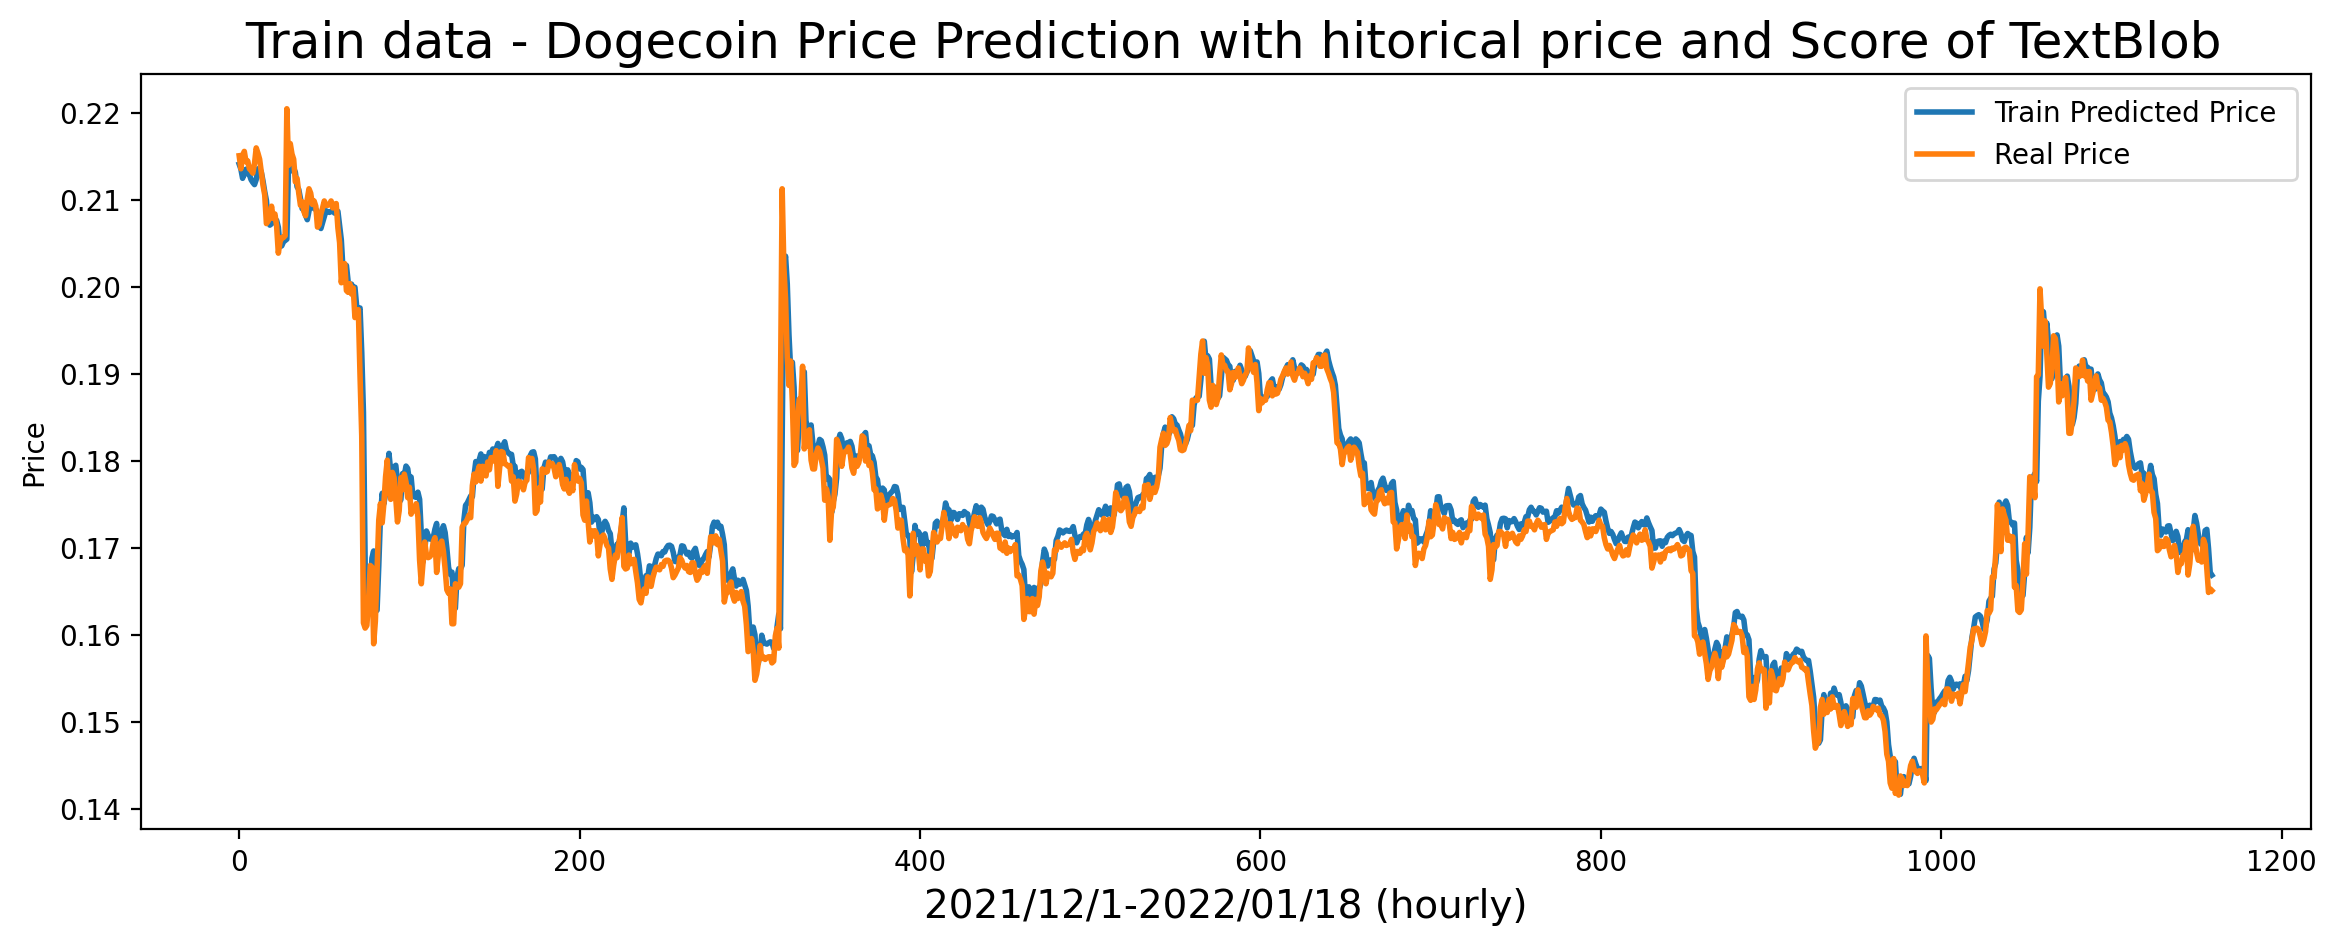

0.0027034579192695618

In [44]:
plot_predictions2(model2,X2_train,y2_train)

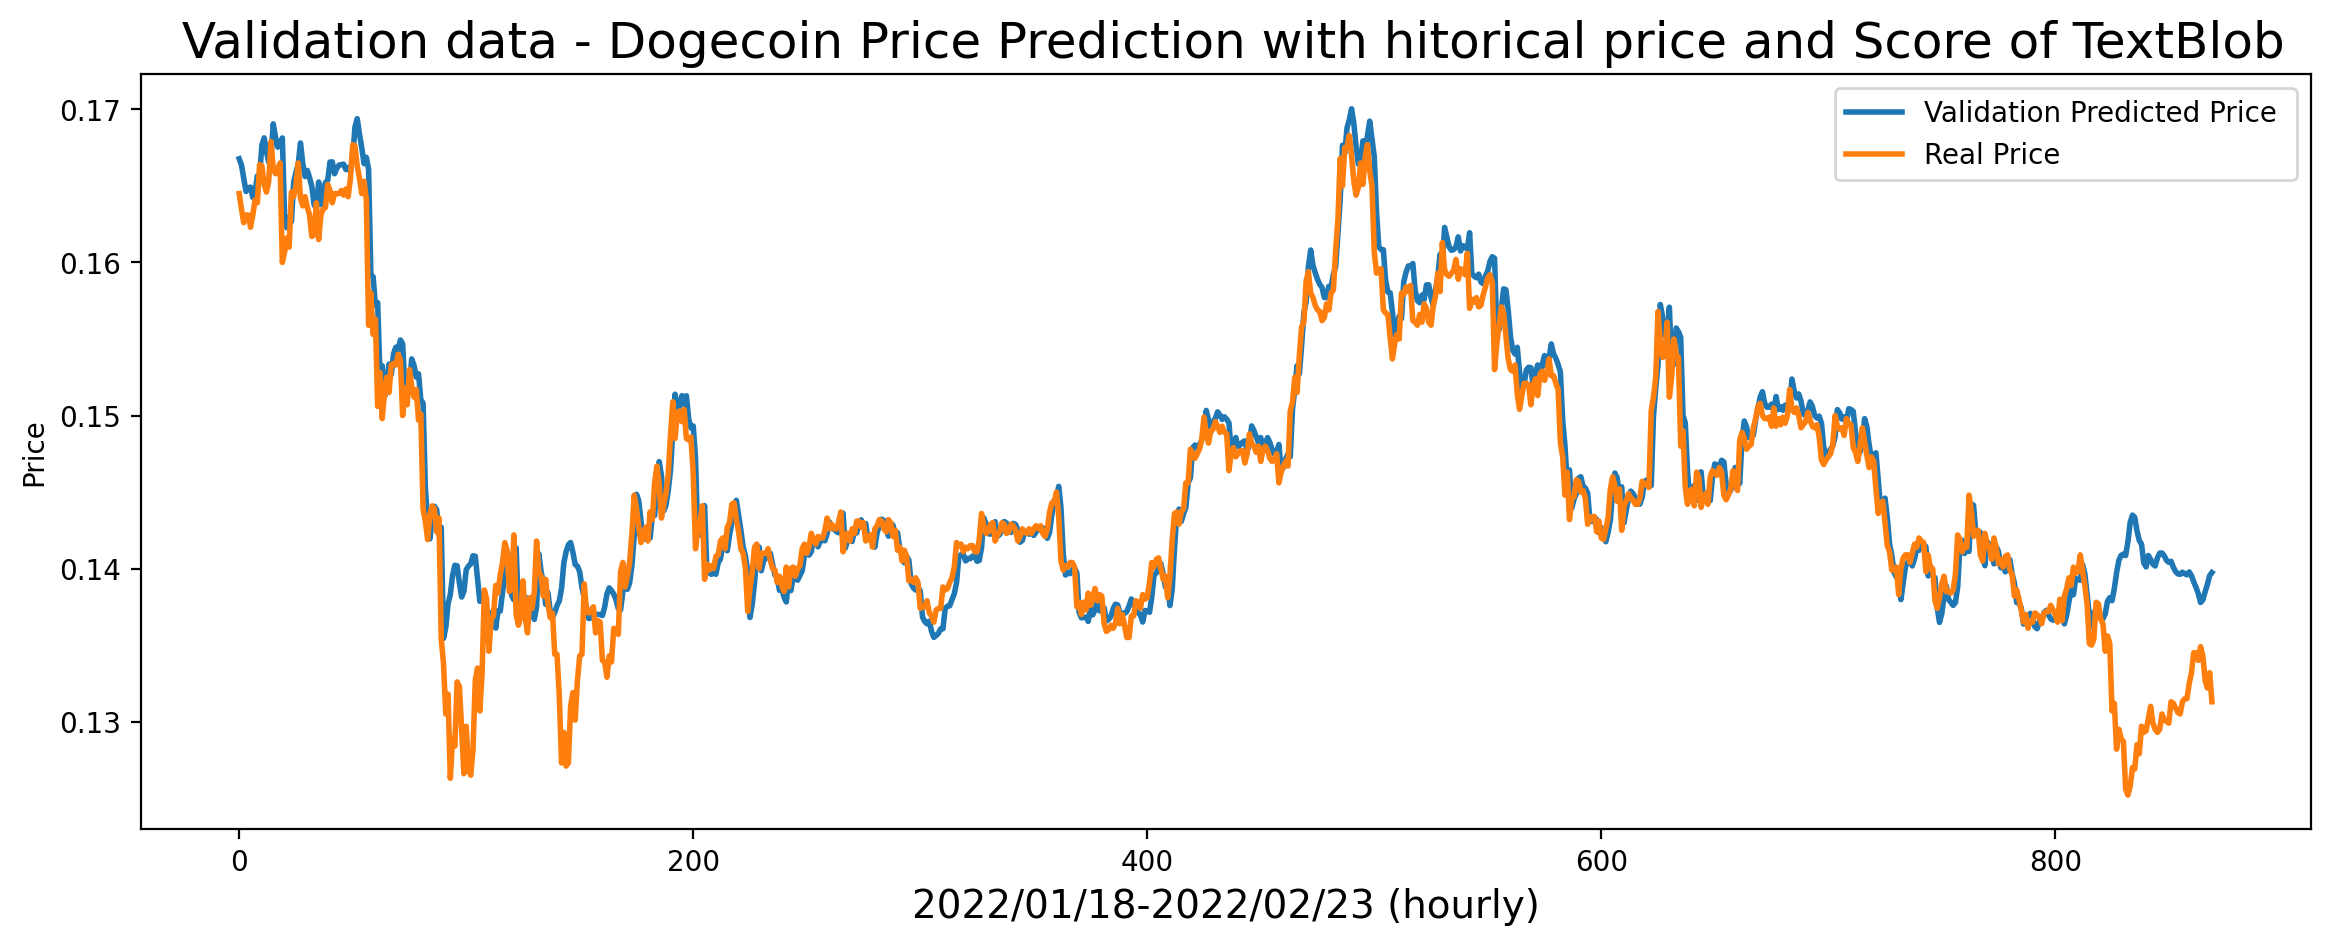

0.0033683546829746938

In [45]:
plot_predictions2(model2,X2_val,y2_val,partofdata='Validation')

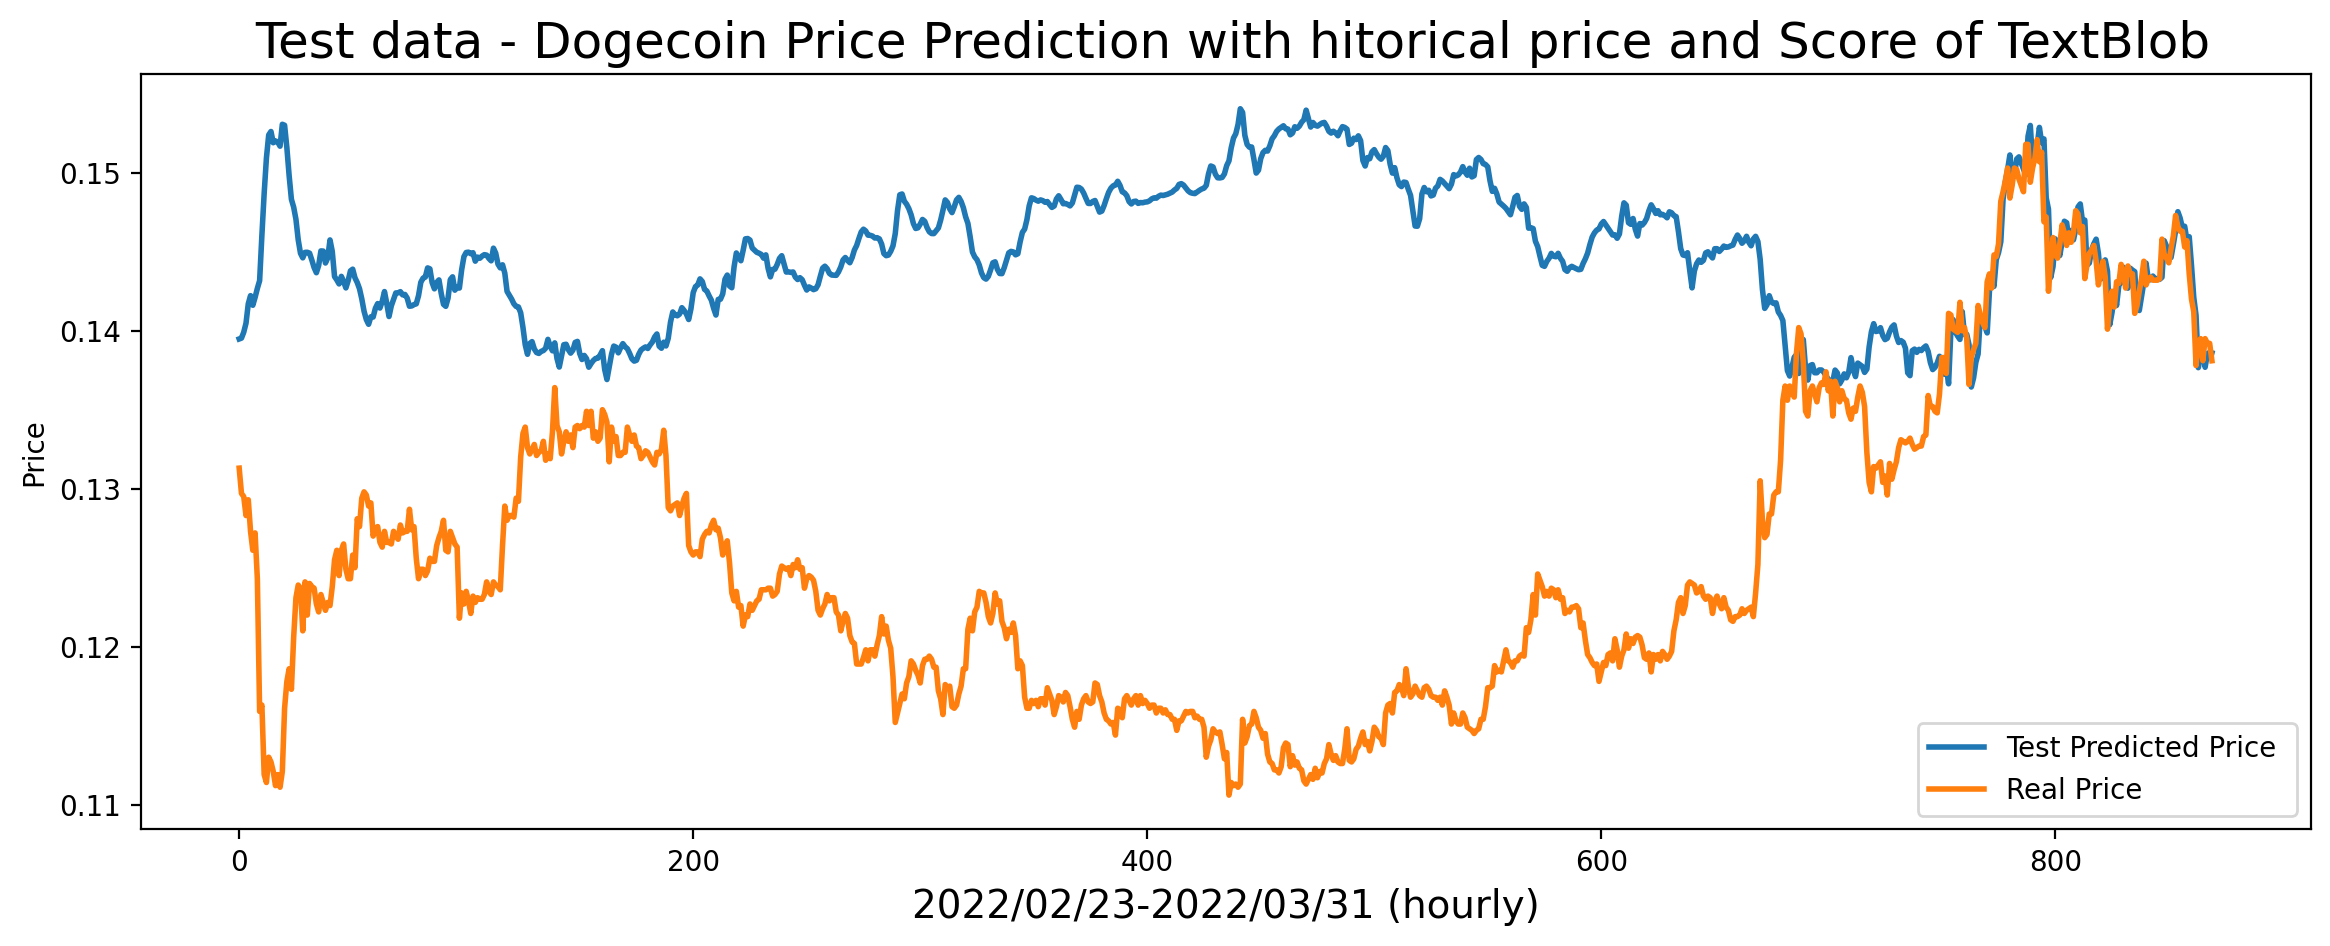

0.023277715509446236

In [46]:
plot_predictions2(model2,X2_test,y2_test,partofdata='Test')

# Close + Compound_NLTK

In [47]:
temp_df = df.drop(columns=['open', 'open_time','low', 'high','volume','ReplyCount', 'RetweetCount', 'LikeCount',
                           'score_TextBlob','negscore_NLTK', 'neuscore_NLTK', 'posscore_NLTK'])
temp_df

close  compound_NLTK
open_time                                 
2021-11-30 20:00:00  0.2151       0.181972
2021-11-30 21:00:00  0.2163       0.223338
2021-11-30 22:00:00  0.2161       0.219767
2021-11-30 23:00:00  0.2151       0.203395
2021-12-01 00:00:00  0.2136       0.175621
...                     ...            ...
2022-03-31 15:00:00  0.1381       0.195424
2022-03-31 16:00:00  0.1395       0.070347
2022-03-31 17:00:00  0.1392       0.121345
2022-03-31 18:00:00  0.1392       0.164512
2022-03-31 19:00:00  0.1381       0.071765

[2903 rows x 2 columns]

In [48]:
X3, y3 = df_to_X_y2(temp_df)
X3.shape, y3.shape

((2900, 3, 2), (2900,))

In [49]:
X3_train, y3_train = X3[:1160], y3[:1160]
X3_val, y3_val = X3[1160:2030], y3[1160:2030]
X3_test, y3_test = X3[2030:], y3[2030:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((1160, 3, 2), (1160,), (870, 3, 2), (870,), (870, 3, 2), (870,))

In [50]:
temp_training_mean = np.mean(X3_train[:, :, 0])
temp_training_std = np.std(X3_train[:, :, 0])

                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

preprocess(X3_train)
preprocess(X3_val)
preprocess(X3_test)

array([[[-2.94637561,  0.12647256],
        [-2.87570821,  0.1589519 ],
        [-3.00997627,  0.11527558]],

       [[-2.87570821,  0.1589519 ],
        [-3.00997627,  0.11527558],
        [-3.00997627,  0.1345454 ]],

       [[-3.00997627,  0.11527558],
        [-3.00997627,  0.1345454 ],
        [-3.12304411,  0.18046848]],

       ...,

       [[-2.43050361,  0.13756683],
        [-2.52943797,  0.19542383],
        [-2.43050361,  0.0703466 ]],

       [[-2.52943797,  0.19542383],
        [-2.43050361,  0.0703466 ],
        [-2.45170383,  0.12134485]],

       [[-2.43050361,  0.0703466 ],
        [-2.45170383,  0.12134485],
        [-2.45170383,  0.1645122 ]]])

In [51]:
model3 = Sequential()
model3.add(InputLayer((3, 2)))
model3.add(LSTM(64))
model3.add(Dropout(0.5))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                17152     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 520       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [52]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model3.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=10, callbacks=[cp3])

Epoch 1/10
 1/37 [..............................] - ETA: 18s - loss: 0.0245 - root_mean_squared_error: 0.1564

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 2s 32ms/step - loss: 0.0050 - root_mean_squared_error: 0.0708 - val_loss: 5.5033e-04 - val_root_mean_squared_error: 0.0235
Epoch 2/10
 1/37 [..............................] - ETA: 0s - loss: 3.6131e-04 - root_mean_squared_error: 0.0190

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 31ms/step - loss: 3.4129e-04 - root_mean_squared_error: 0.0185 - val_loss: 8.6041e-05 - val_root_mean_squared_error: 0.0093
Epoch 3/10
 1/37 [..............................] - ETA: 0s - loss: 6.8491e-05 - root_mean_squared_error: 0.0083

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 27ms/step - loss: 9.6584e-05 - root_mean_squared_error: 0.0098 - val_loss: 3.2725e-05 - val_root_mean_squared_error: 0.0057
Epoch 4/10
 1/37 [..............................] - ETA: 0s - loss: 1.1421e-04 - root_mean_squared_error: 0.0107

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 32ms/step - loss: 4.8510e-05 - root_mean_squared_error: 0.0070 - val_loss: 2.2901e-05 - val_root_mean_squared_error: 0.0048
Epoch 5/10
 1/37 [..............................] - ETA: 0s - loss: 2.5046e-05 - root_mean_squared_error: 0.0050

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 27ms/step - loss: 4.2196e-05 - root_mean_squared_error: 0.0065 - val_loss: 1.9971e-05 - val_root_mean_squared_error: 0.0045
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 2.8155e-05 - root_mean_squared_error: 0.0053 - val_loss: 2.5540e-05 - val_root_mean_squared_error: 0.0051
Epoch 7/10
 1/37 [..............................] - ETA: 0s - loss: 8.3271e-06 - root_mean_squared_error: 0.0029

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 33ms/step - loss: 2.2833e-05 - root_mean_squared_error: 0.0048 - val_loss: 1.0085e-05 - val_root_mean_squared_error: 0.0032
Epoch 8/10
32/37 [========================>.....] - ETA: 0s - loss: 2.3750e-05 - root_mean_squared_error: 0.0049

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


37/37 [==============================] - 1s 28ms/step - loss: 2.4080e-05 - root_mean_squared_error: 0.0049 - val_loss: 5.1645e-06 - val_root_mean_squared_error: 0.0023
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 1.7626e-05 - root_mean_squared_error: 0.0042 - val_loss: 6.1194e-06 - val_root_mean_squared_error: 0.0025
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 2.0525e-05 - root_mean_squared_error: 0.0045 - val_loss: 6.9974e-06 - val_root_mean_squared_error: 0.0026


In [53]:
def plot_predictions3(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 2)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction with hitorical price and Vader Score',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

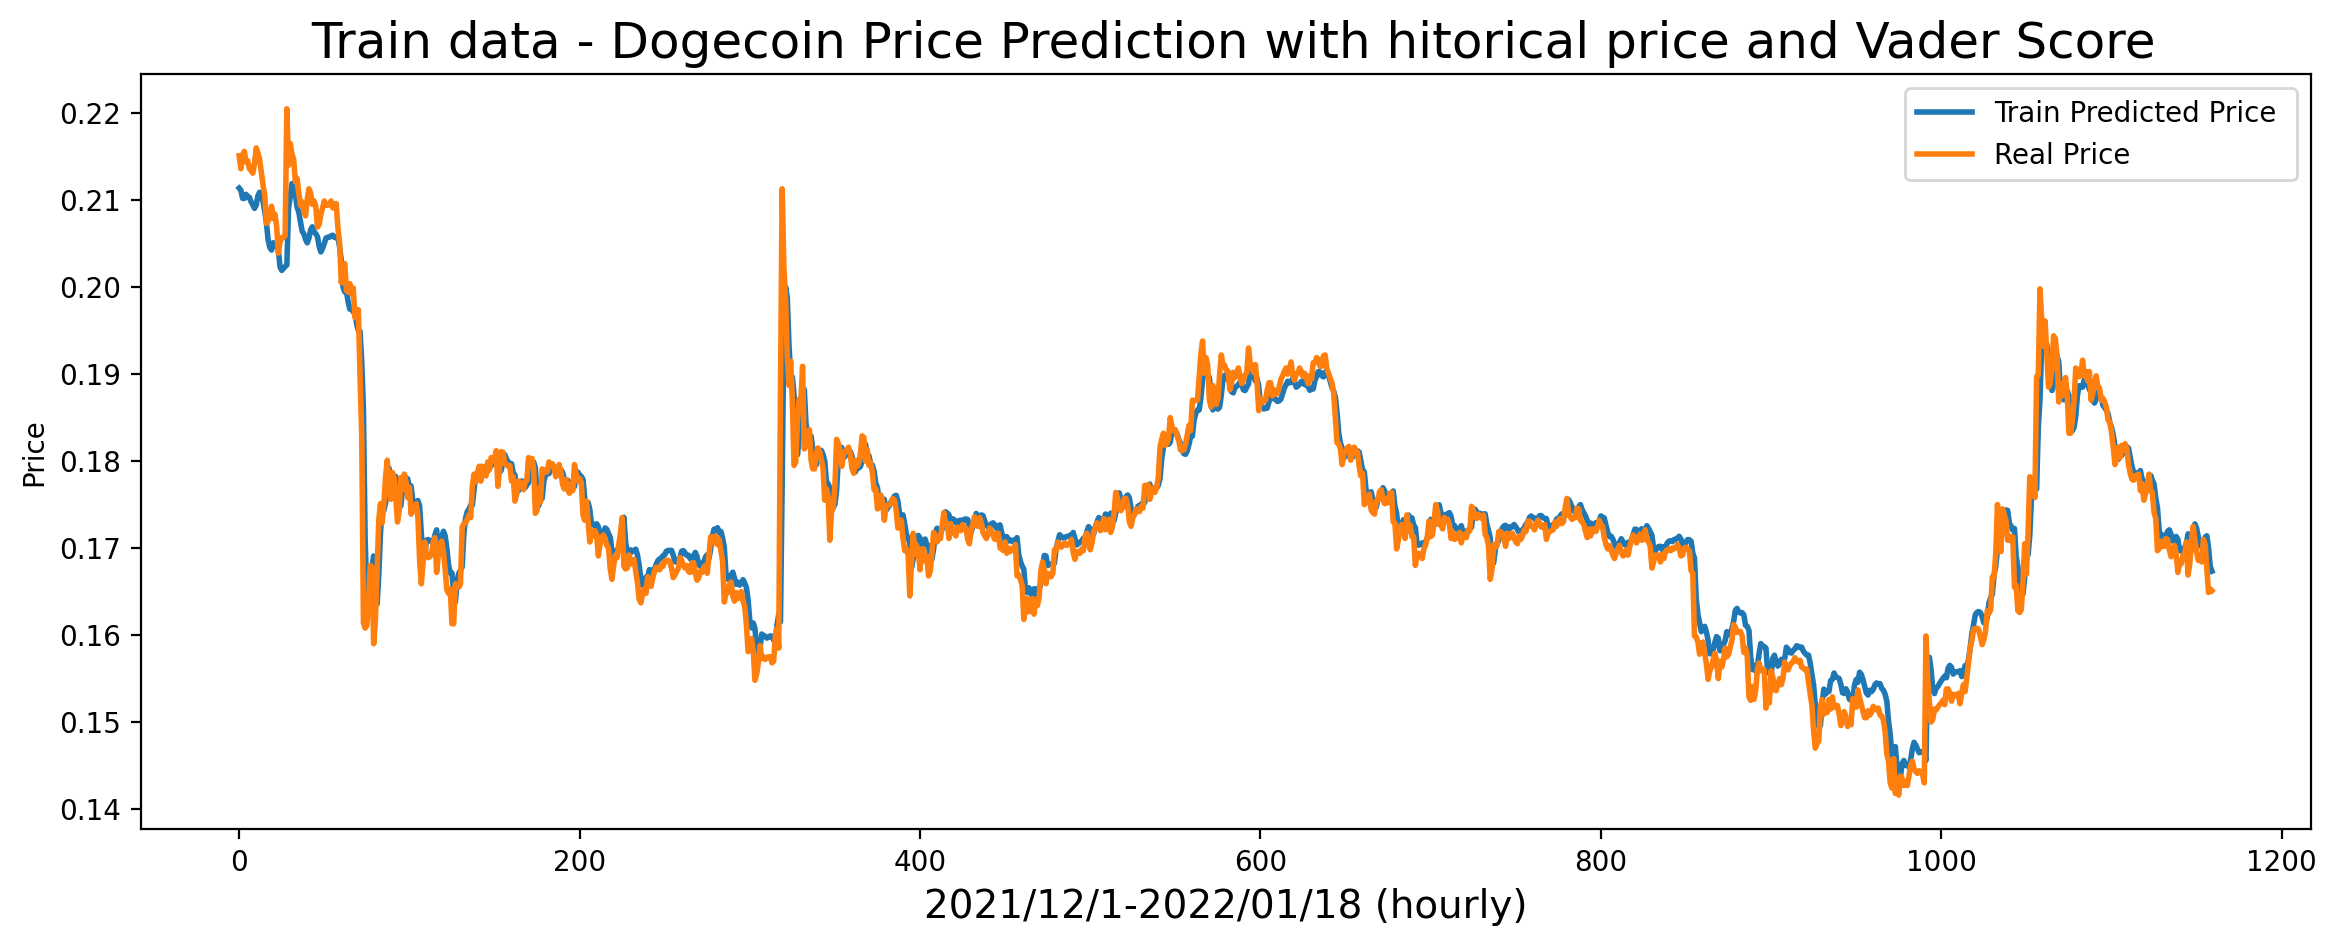

0.0028562248208144295

In [54]:
plot_predictions3(model3,X3_train,y3_train)

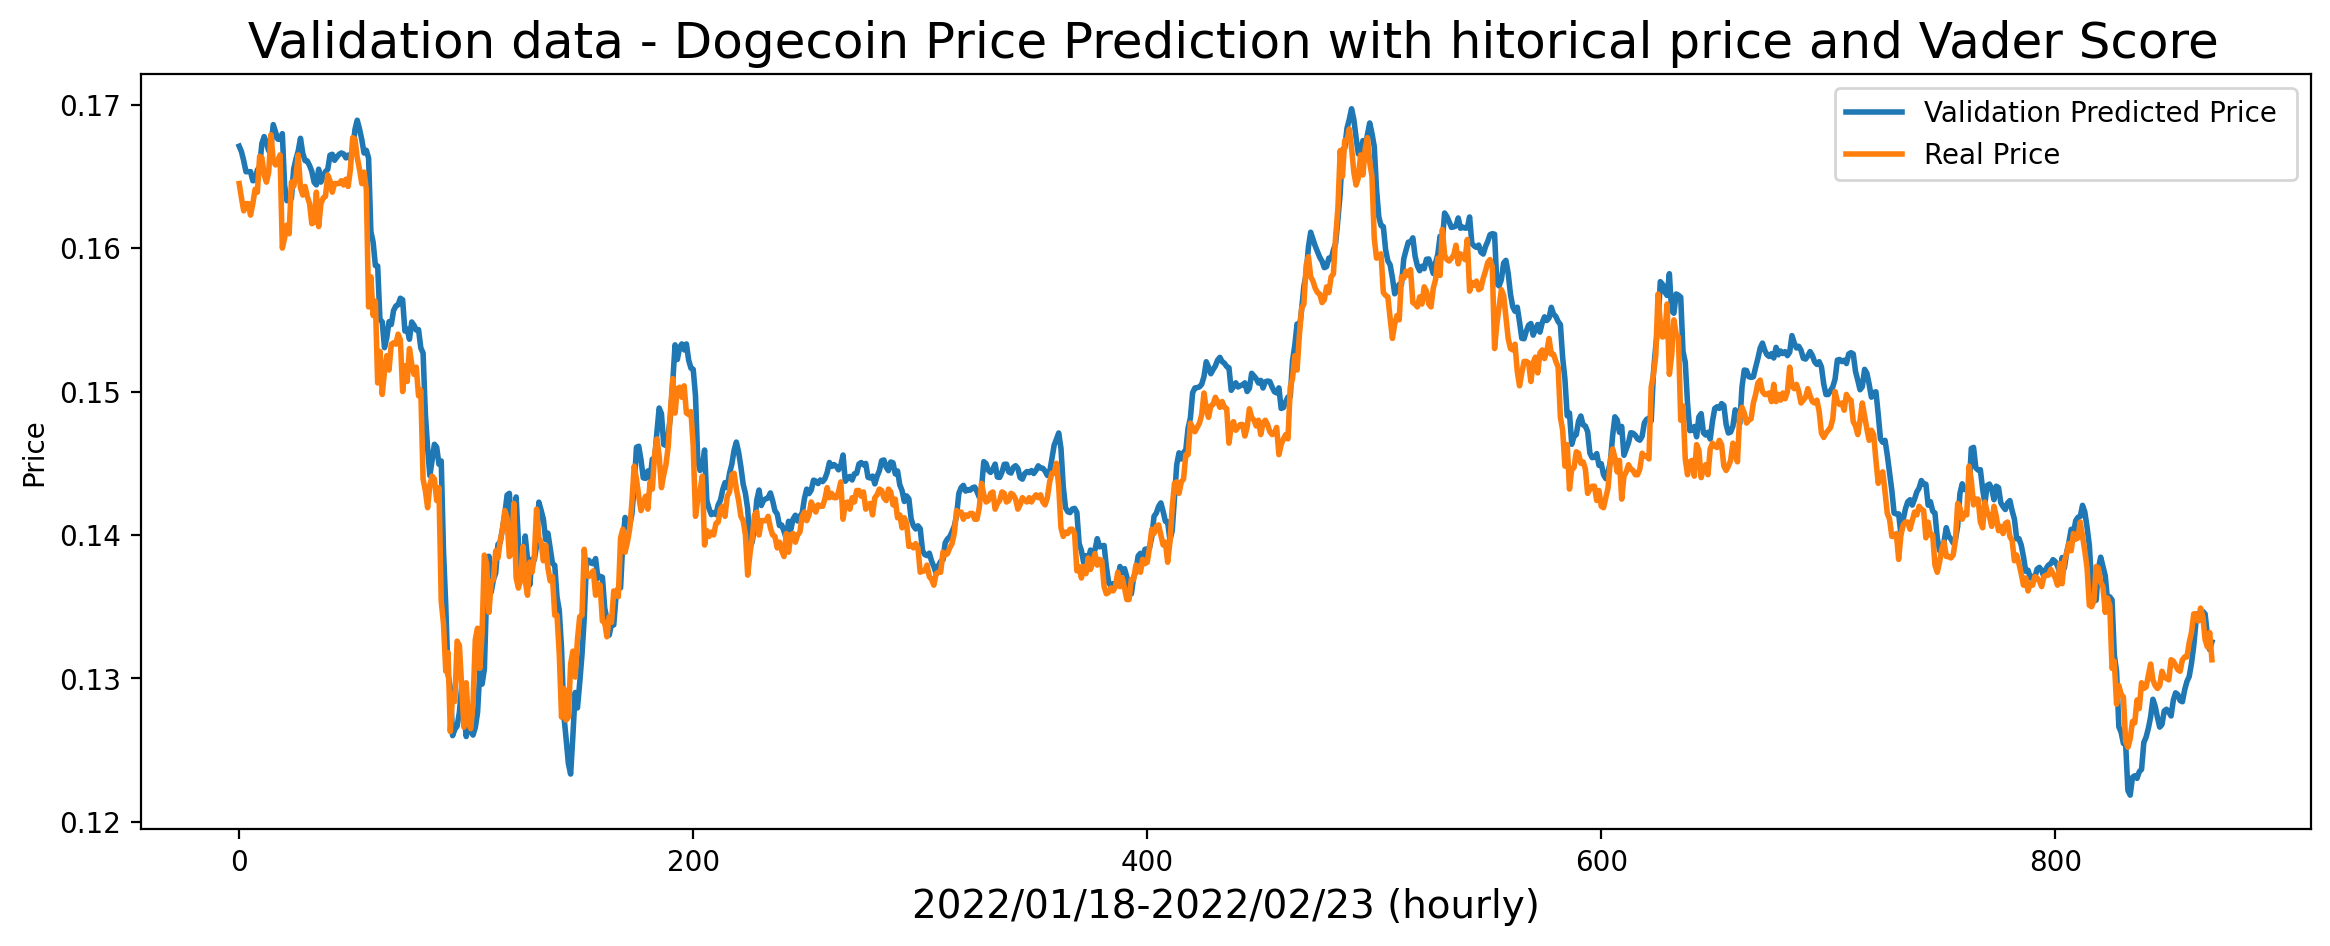

0.002645258316843066

In [55]:
plot_predictions3(model3,X3_val,y3_val,partofdata='Validation')

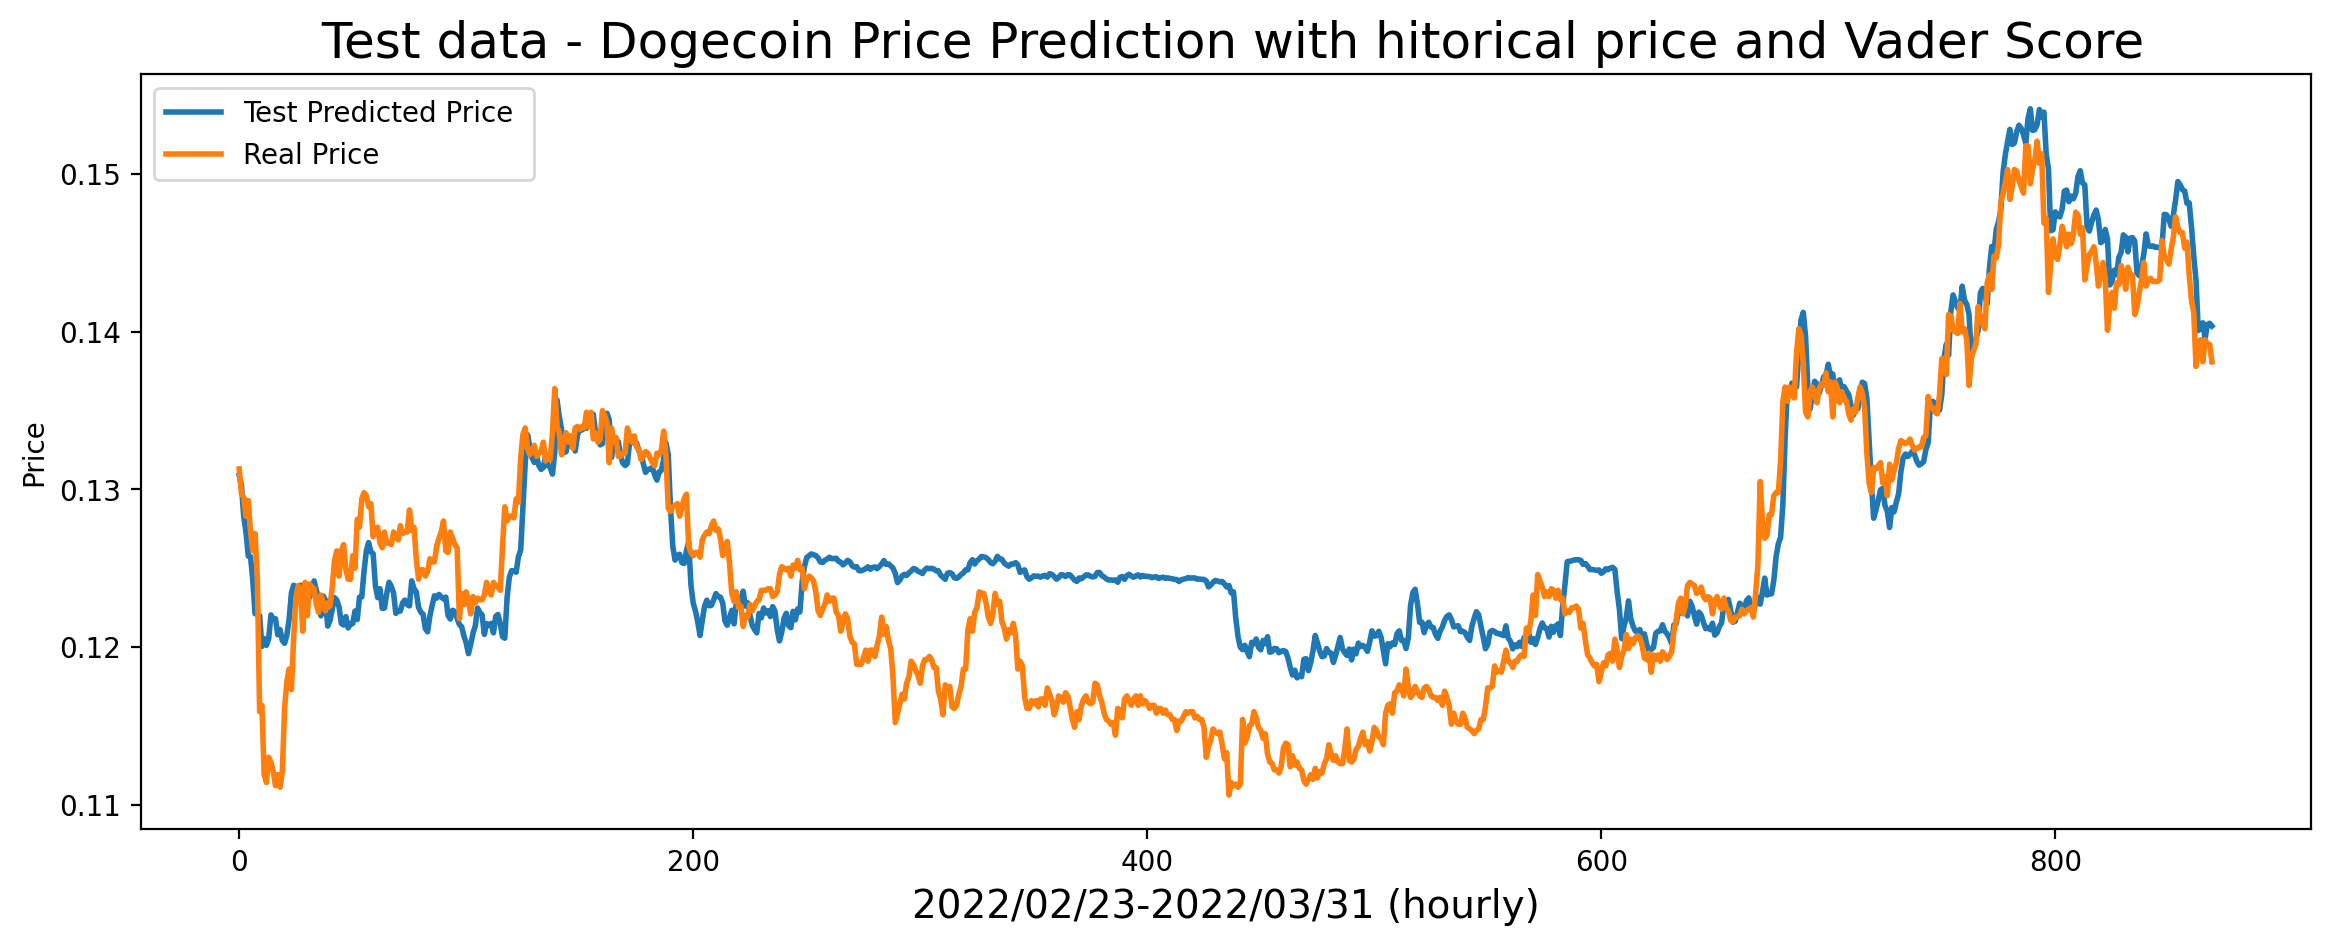

0.0046468373015543084

In [56]:
plot_predictions3(model3,X3_test,y3_test,partofdata='Test')

# Close price+ TextBLob * Retweet Count

In [57]:
df['score_TextBlob2'] = df['score_TextBlob']*df['RetweetCount']
df['score_TextBlob3'] = df['score_TextBlob']*df['ReplyCount']
df['compound_NLTK2'] = df['compound_NLTK']*df['RetweetCount']
df['compound_NLTK3'] = df['compound_NLTK']*df['ReplyCount']
temp_df = df.drop(columns=['open', 'open_time','low', 'high','volume','ReplyCount', 'score_TextBlob','score_TextBlob3',
                           'RetweetCount', 'LikeCount','negscore_NLTK', 'neuscore_NLTK', 'posscore_NLTK', 
                           'compound_NLTK','compound_NLTK2','compound_NLTK3'])
temp_df

close  score_TextBlob2
open_time                                   
2021-11-30 20:00:00  0.2151         0.260089
2021-11-30 21:00:00  0.2163         0.421807
2021-11-30 22:00:00  0.2161         0.287382
2021-11-30 23:00:00  0.2151         0.146460
2021-12-01 00:00:00  0.2136         0.470396
...                     ...              ...
2022-03-31 15:00:00  0.1381         0.058819
2022-03-31 16:00:00  0.1395         0.042319
2022-03-31 17:00:00  0.1392         0.054764
2022-03-31 18:00:00  0.1392         0.237475
2022-03-31 19:00:00  0.1381         0.106943

[2903 rows x 2 columns]

In [58]:
X4, y4 = df_to_X_y2(temp_df)
X4.shape, y4.shape

((2900, 3, 2), (2900,))

In [59]:
X4_train, y4_train = X4[:1160], y4[:1160]
X4_val, y4_val = X4[1160:2030], y4[1160:2030]
X4_test, y4_test = X4[2030:], y4[2030:]
X4_train.shape, y4_train.shape, X4_val.shape, y4_val.shape, X4_test.shape, y4_test.shape

((1160, 3, 2), (1160,), (870, 3, 2), (870,), (870, 3, 2), (870,))

In [60]:
temp_training_mean = np.mean(X4_train[:, :, 0])
temp_training_std = np.std(X4_train[:, :, 0])
temp_training_mean1 = np.mean(X4_train[:, :, 1])
temp_training_std1 = np.std(X4_train[:, :, 1])
                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean1) / temp_training_std1
    return X

preprocess(X4_train)
preprocess(X4_val)
preprocess(X4_test)

array([[[-2.94637561, -0.11832235],
        [-2.87570821,  0.21016332],
        [-3.00997627, -0.19745444]],

       [[-2.87570821,  0.21016332],
        [-3.00997627, -0.19745444],
        [-3.00997627,  0.15848139]],

       [[-3.00997627, -0.19745444],
        [-3.00997627,  0.15848139],
        [-3.12304411, -0.00516214]],

       ...,

       [[-2.43050361, -0.27874343],
        [-2.52943797, -0.43657391],
        [-2.43050361, -0.48110062]],

       [[-2.52943797, -0.43657391],
        [-2.43050361, -0.48110062],
        [-2.45170383, -0.44751645]],

       [[-2.43050361, -0.48110062],
        [-2.45170383, -0.44751645],
        [-2.45170383,  0.04554468]]])

In [61]:
model4 = Sequential()
model4.add(InputLayer((3, 2)))
model4.add(LSTM(64))
model4.add(Dropout(0.5))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 64)                17152     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,681
Trainable params: 17,681
Non-trainable params: 0
_________________________________________________________________


In [62]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model4.fit(X4_train, y4_train, validation_data=(X4_val, y4_val), epochs=10, callbacks=[cp4])

Epoch 1/10
 1/37 [..............................] - ETA: 18s - loss: 0.0320 - root_mean_squared_error: 0.1789

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


37/37 [==============================] - 2s 31ms/step - loss: 0.0043 - root_mean_squared_error: 0.0658 - val_loss: 5.3454e-04 - val_root_mean_squared_error: 0.0231
Epoch 2/10
 1/37 [..............................] - ETA: 0s - loss: 1.7485e-04 - root_mean_squared_error: 0.0132

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


37/37 [==============================] - 1s 31ms/step - loss: 1.6506e-04 - root_mean_squared_error: 0.0128 - val_loss: 3.1523e-05 - val_root_mean_squared_error: 0.0056
Epoch 3/10
 1/37 [..............................] - ETA: 0s - loss: 7.8528e-05 - root_mean_squared_error: 0.0089

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


37/37 [==============================] - 1s 28ms/step - loss: 8.4777e-05 - root_mean_squared_error: 0.0092 - val_loss: 1.1117e-05 - val_root_mean_squared_error: 0.0033
Epoch 4/10
 1/37 [..............................] - ETA: 0s - loss: 6.9801e-05 - root_mean_squared_error: 0.0084

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


37/37 [==============================] - 1s 32ms/step - loss: 4.8562e-05 - root_mean_squared_error: 0.0070 - val_loss: 7.7025e-06 - val_root_mean_squared_error: 0.0028
Epoch 5/10
 1/37 [..............................] - ETA: 0s - loss: 5.1596e-05 - root_mean_squared_error: 0.0072

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


37/37 [==============================] - 1s 28ms/step - loss: 4.0611e-05 - root_mean_squared_error: 0.0064 - val_loss: 5.3566e-06 - val_root_mean_squared_error: 0.0023
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 3.4316e-05 - root_mean_squared_error: 0.0059 - val_loss: 6.7923e-06 - val_root_mean_squared_error: 0.0026
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 2.7022e-05 - root_mean_squared_error: 0.0052 - val_loss: 7.0473e-06 - val_root_mean_squared_error: 0.0027
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 2.3499e-05 - root_mean_squared_error: 0.0048 - val_loss: 6.3070e-06 - val_root_mean_squared_error: 0.0025
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 2.6534e-05 - root_mean_squared_error: 0.0052 - val_loss: 1.4104e-05 - val_root_mean_squared_error: 0.0038
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 2.0378e-05 - root_mean_squared_error: 0.0045 - 

In [63]:
def plot_predictions4(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 2)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction with hitorical price and TB Score x Retweet Count',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

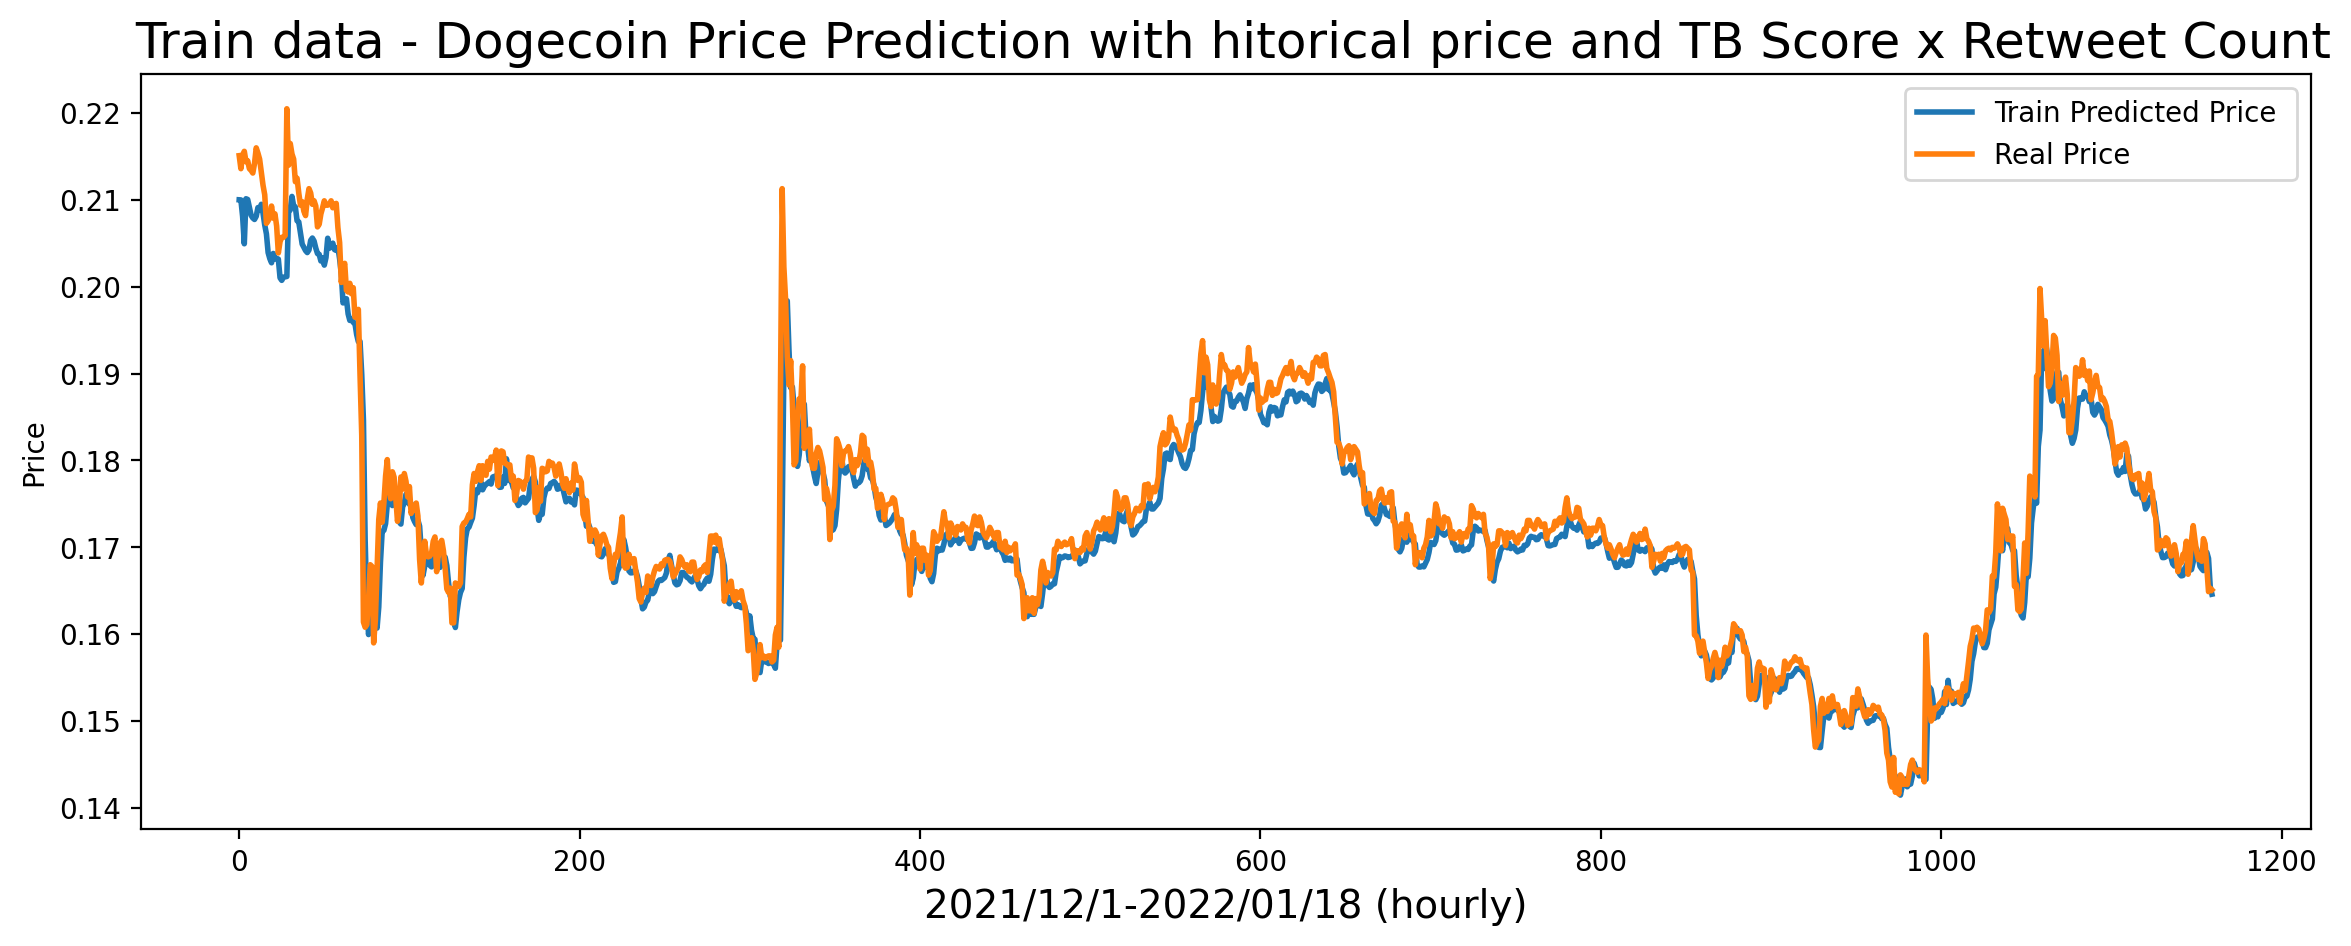

0.0031589794679758336

In [64]:
plot_predictions4(model4,X4_train,y4_train)

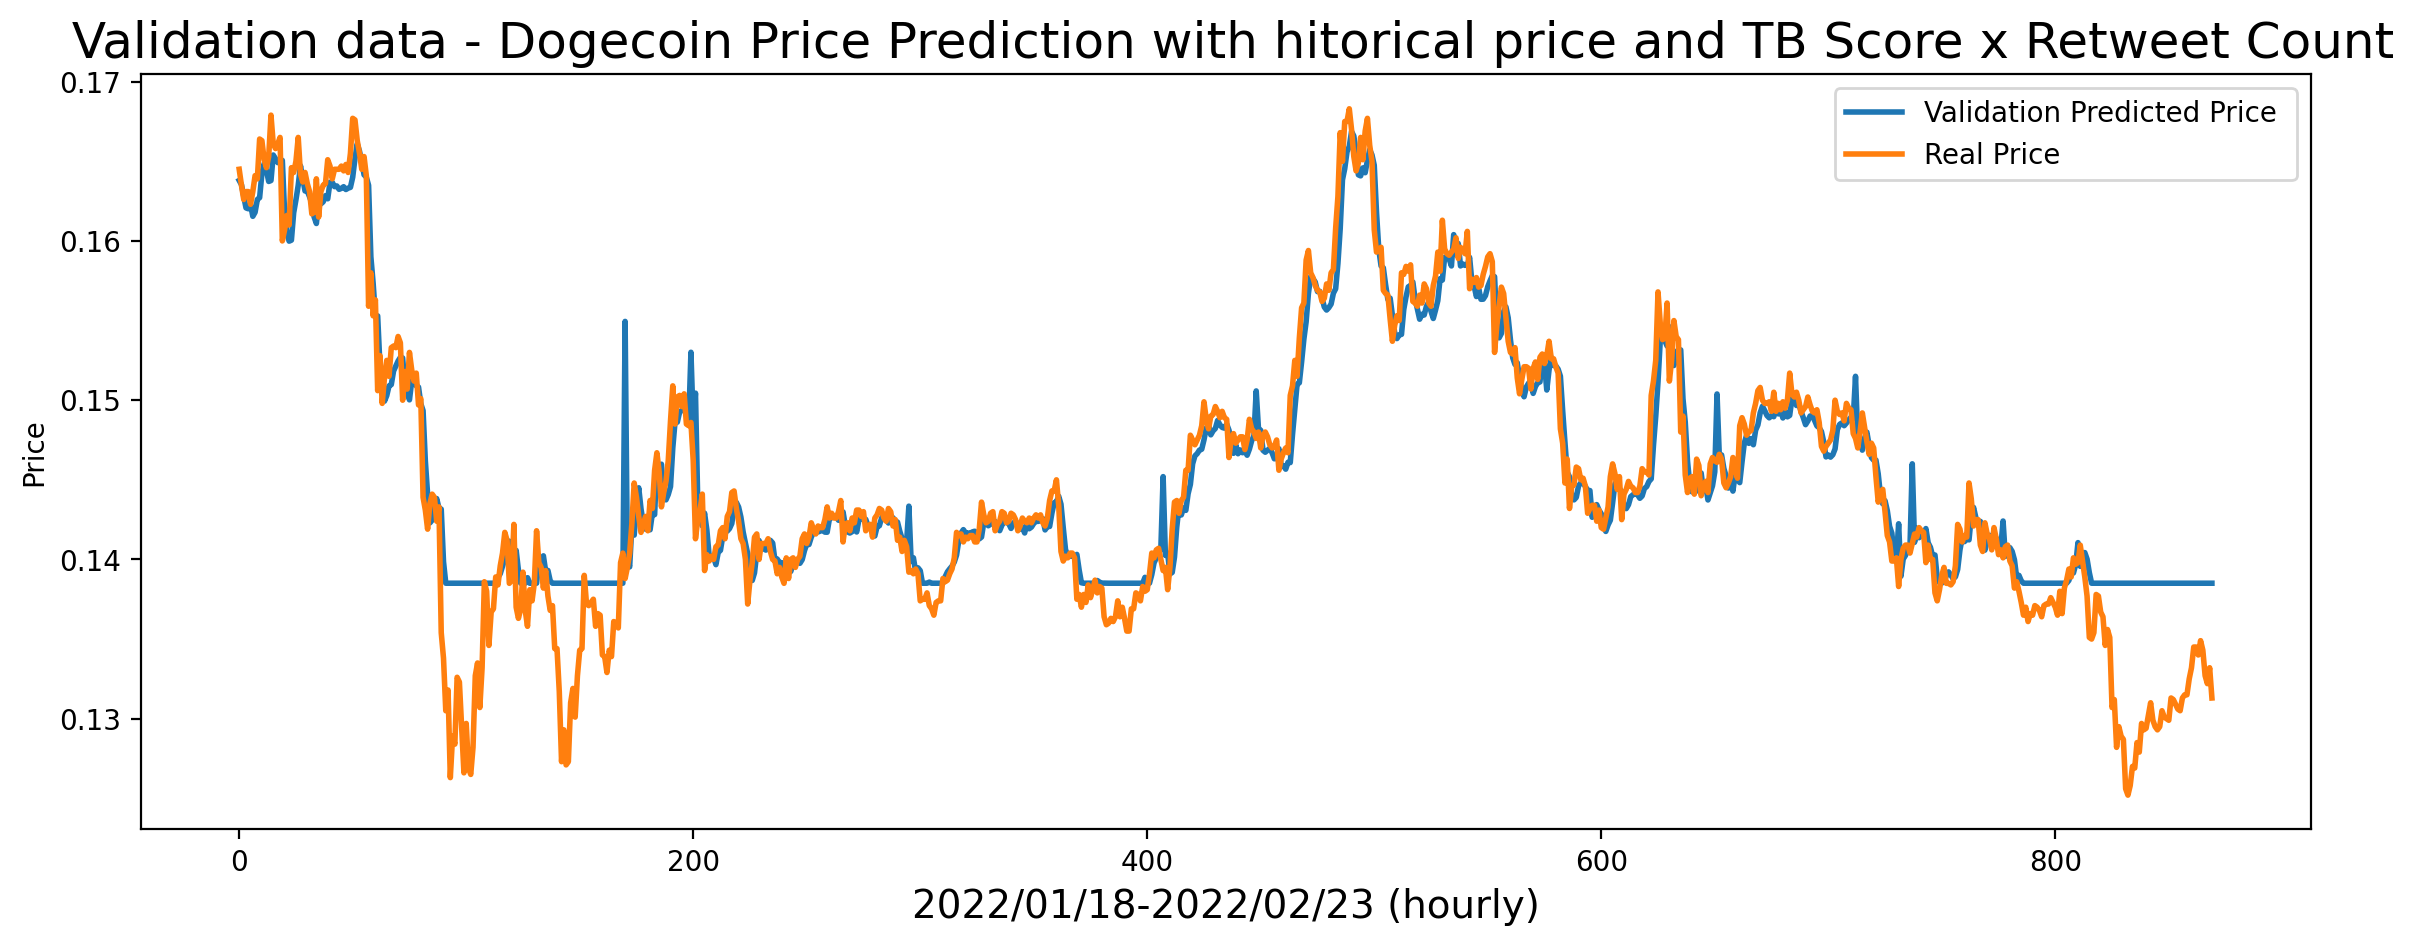

0.0030191645367322645

In [66]:
plot_predictions4(model4,X4_val,y4_val,partofdata='Validation')

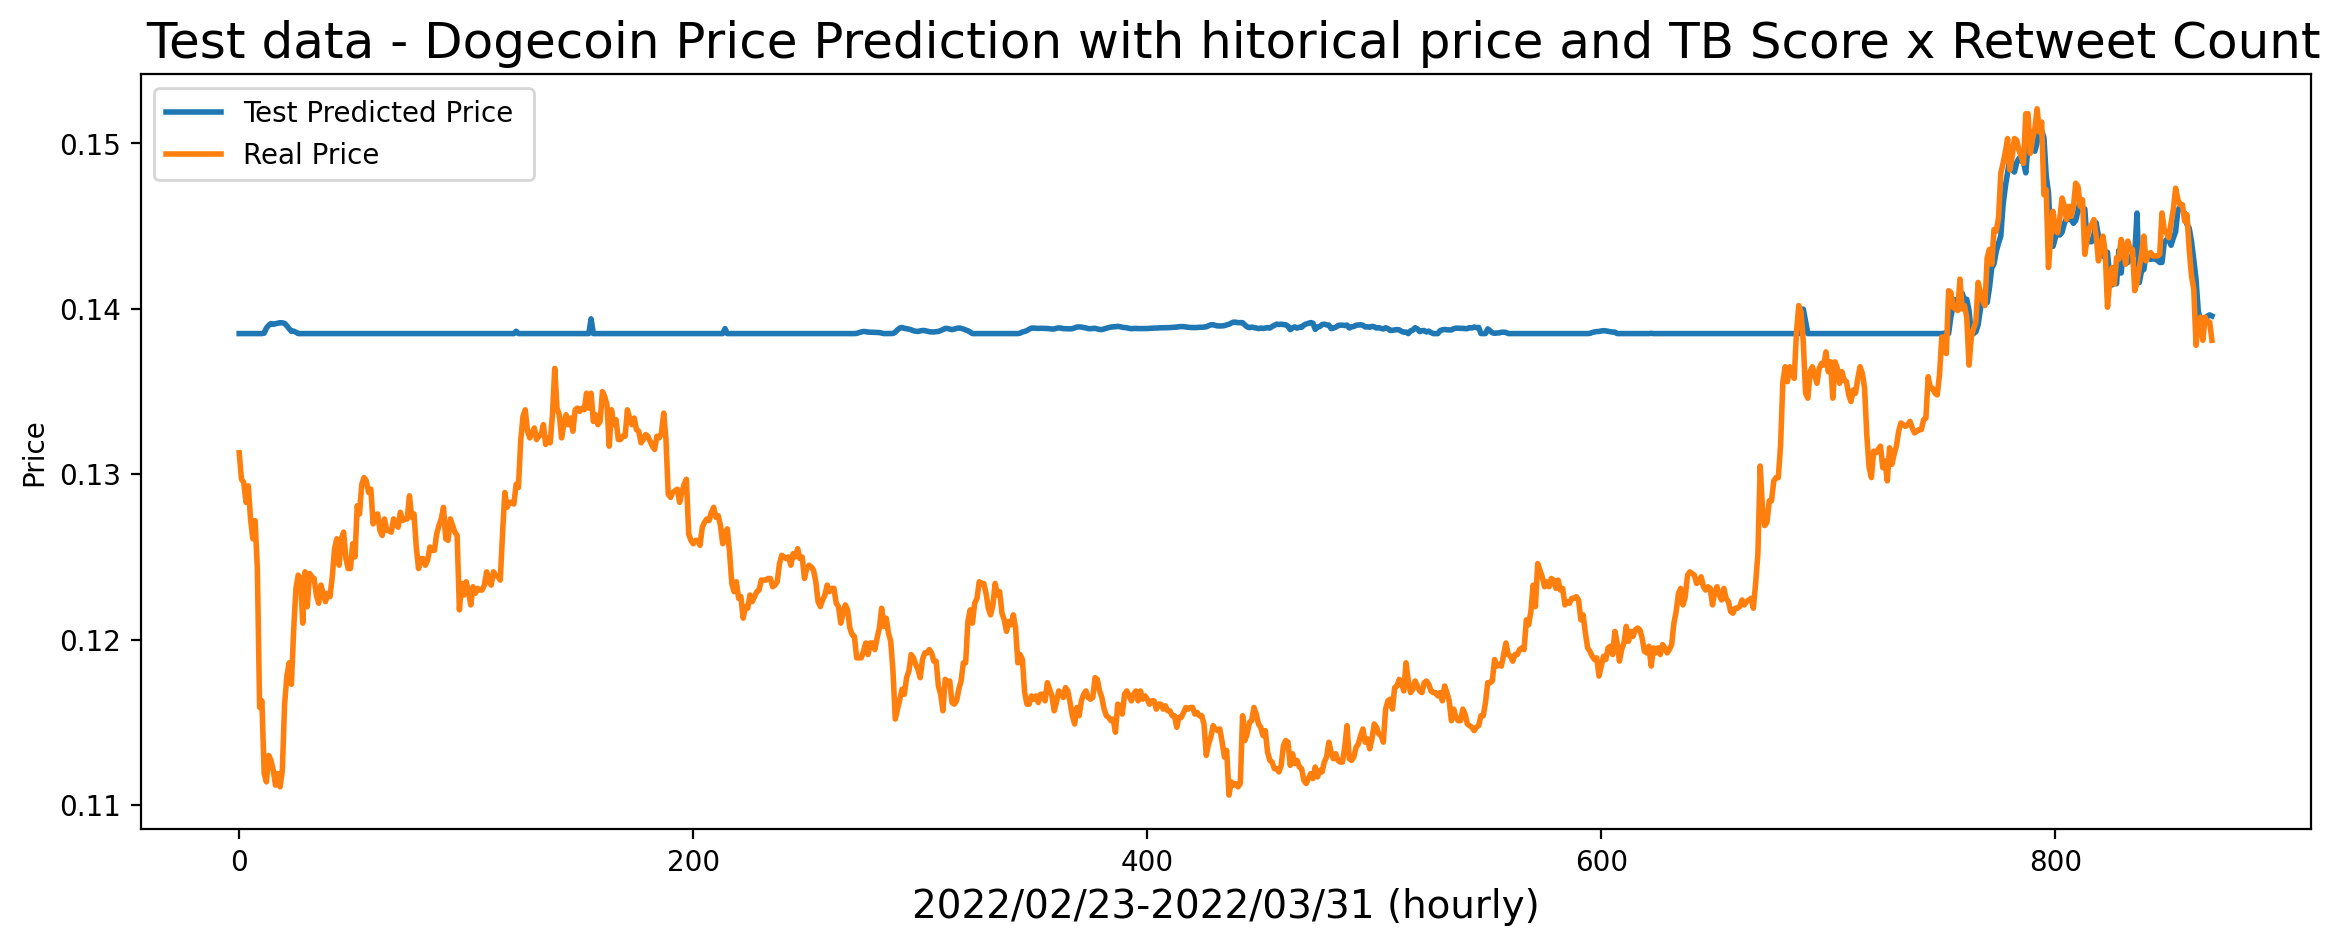

0.016252637185290165

In [65]:
plot_predictions4(model4,X4_test,y4_test,partofdata='Test')

# # close price + compound NLTK * Retweet Count

In [67]:
temp_df = df.drop(columns=['open', 'open_time','low', 'high','ReplyCount', 'score_TextBlob','score_TextBlob2','score_TextBlob3',
                           'RetweetCount', 'LikeCount','negscore_NLTK', 'neuscore_NLTK', 'posscore_NLTK', 
                           'compound_NLTK','compound_NLTK3'])
temp_df

close      volume  compound_NLTK2
open_time                                              
2021-11-30 20:00:00  0.2151  40983481.0        0.430001
2021-11-30 21:00:00  0.2163  15819679.0        0.682597
2021-11-30 22:00:00  0.2161  25971589.0        0.468237
2021-11-30 23:00:00  0.2151  27280328.0        0.176376
2021-12-01 00:00:00  0.2136  35810684.0        0.525302
...                     ...         ...             ...
2022-03-31 15:00:00  0.1381  31451318.0        0.143783
2022-03-31 16:00:00  0.1395  33492651.0        0.046038
2022-03-31 17:00:00  0.1392  14805957.0        0.087515
2022-03-31 18:00:00  0.1392  17736121.0        0.324009
2022-03-31 19:00:00  0.1381  59144016.0        0.162938

[2903 rows x 3 columns]

In [68]:
X5, y5 = df_to_X_y2(temp_df)
X5.shape, y5.shape

((2900, 3, 3), (2900,))

In [69]:
X5_train, y5_train = X5[:1160], y5[:1160]
X5_val, y5_val = X5[1160:2030], y5[1160:2030]
X5_test, y5_test = X5[2030:], y5[2030:]
X5_train.shape, y5_train.shape, X5_val.shape, y5_val.shape, X5_test.shape, y5_test.shape

((1160, 3, 3), (1160,), (870, 3, 3), (870,), (870, 3, 3), (870,))

In [70]:
temp_training_mean = np.mean(X5_train[:, :, 0])
temp_training_std = np.std(X5_train[:, :, 0])
temp_training_mean1 = np.mean(X5_train[:, :, 1])
temp_training_std1 = np.std(X5_train[:, :, 1])
temp_training_mean2 = np.mean(X5_train[:, :, 2])
temp_training_std2 = np.std(X5_train[:, :, 2])
                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean1) / temp_training_std1
    X[:, :, 2] = (X[:, :, 2] - temp_training_mean1) / temp_training_std1
    return X

preprocess(X5_train)
preprocess(X5_val)
preprocess(X5_test)

array([[[-2.94637561, -0.21775883, -0.47987696],
        [-2.87570821, -0.09071955, -0.47987696],
        [-3.00997627, -0.18873689, -0.47987696]],

       [[-2.87570821, -0.09071955, -0.47987696],
        [-3.00997627, -0.18873689, -0.47987696],
        [-3.00997627, -0.02691714, -0.47987696]],

       [[-3.00997627, -0.18873689, -0.47987696],
        [-3.00997627, -0.02691714, -0.47987696],
        [-3.12304411, -0.26360356, -0.47987696]],

       ...,

       [[-2.43050361, -0.10033934, -0.47987696],
        [-2.52943797, -0.18908971, -0.47987696],
        [-2.43050361, -0.1702163 , -0.47987697]],

       [[-2.52943797, -0.18908971, -0.47987696],
        [-2.43050361, -0.1702163 , -0.47987697],
        [-2.45170383, -0.34298656, -0.47987697]],

       [[-2.43050361, -0.1702163 , -0.47987697],
        [-2.45170383, -0.34298656, -0.47987697],
        [-2.45170383, -0.31589535, -0.47987696]]])

In [71]:
model5 = Sequential()
model5.add(InputLayer((3, 3)))
model5.add(LSTM(64))
model5.add(Dropout(0.5))
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 64)                17408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 8)                 520       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [72]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model5.fit(X5_train, y5_train, validation_data=(X5_val, y5_val), epochs=10, callbacks=[cp5])

Epoch 1/10
 1/37 [..............................] - ETA: 25s - loss: 0.0491 - root_mean_squared_error: 0.2216

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


37/37 [==============================] - 2s 42ms/step - loss: 0.0053 - root_mean_squared_error: 0.0731 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0416
Epoch 2/10
 1/37 [..............................] - ETA: 0s - loss: 9.0326e-04 - root_mean_squared_error: 0.0301

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


37/37 [==============================] - 1s 27ms/step - loss: 5.0555e-04 - root_mean_squared_error: 0.0225 - val_loss: 6.9949e-05 - val_root_mean_squared_error: 0.0084
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 1.6937e-04 - root_mean_squared_error: 0.0130 - val_loss: 1.1297e-04 - val_root_mean_squared_error: 0.0106
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 8.8802e-05 - root_mean_squared_error: 0.0094 - val_loss: 1.1310e-04 - val_root_mean_squared_error: 0.0106
Epoch 5/10
 1/37 [..............................] - ETA: 0s - loss: 5.4980e-05 - root_mean_squared_error: 0.0074

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


37/37 [==============================] - 1s 33ms/step - loss: 4.7690e-05 - root_mean_squared_error: 0.0069 - val_loss: 3.6283e-05 - val_root_mean_squared_error: 0.0060
Epoch 6/10
37/37 [==============================] - 0s 4ms/step - loss: 3.5719e-05 - root_mean_squared_error: 0.0060 - val_loss: 3.7622e-05 - val_root_mean_squared_error: 0.0061
Epoch 7/10
 1/37 [..............................] - ETA: 0s - loss: 1.9032e-05 - root_mean_squared_error: 0.0044

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


37/37 [==============================] - 1s 28ms/step - loss: 3.5394e-05 - root_mean_squared_error: 0.0059 - val_loss: 1.4885e-05 - val_root_mean_squared_error: 0.0039
Epoch 8/10
 1/37 [..............................] - ETA: 0s - loss: 4.1128e-05 - root_mean_squared_error: 0.0064

INFO:tensorflow:Assets written to: model5/assets


INFO:tensorflow:Assets written to: model5/assets


37/37 [==============================] - 1s 28ms/step - loss: 2.7889e-05 - root_mean_squared_error: 0.0053 - val_loss: 1.3632e-05 - val_root_mean_squared_error: 0.0037
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 2.9015e-05 - root_mean_squared_error: 0.0054 - val_loss: 1.6269e-05 - val_root_mean_squared_error: 0.0040
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 2.8205e-05 - root_mean_squared_error: 0.0053 - val_loss: 1.5748e-05 - val_root_mean_squared_error: 0.0040


In [73]:
def plot_predictions5(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 2)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction with hitorical price and VADER Score x Retweet Count',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

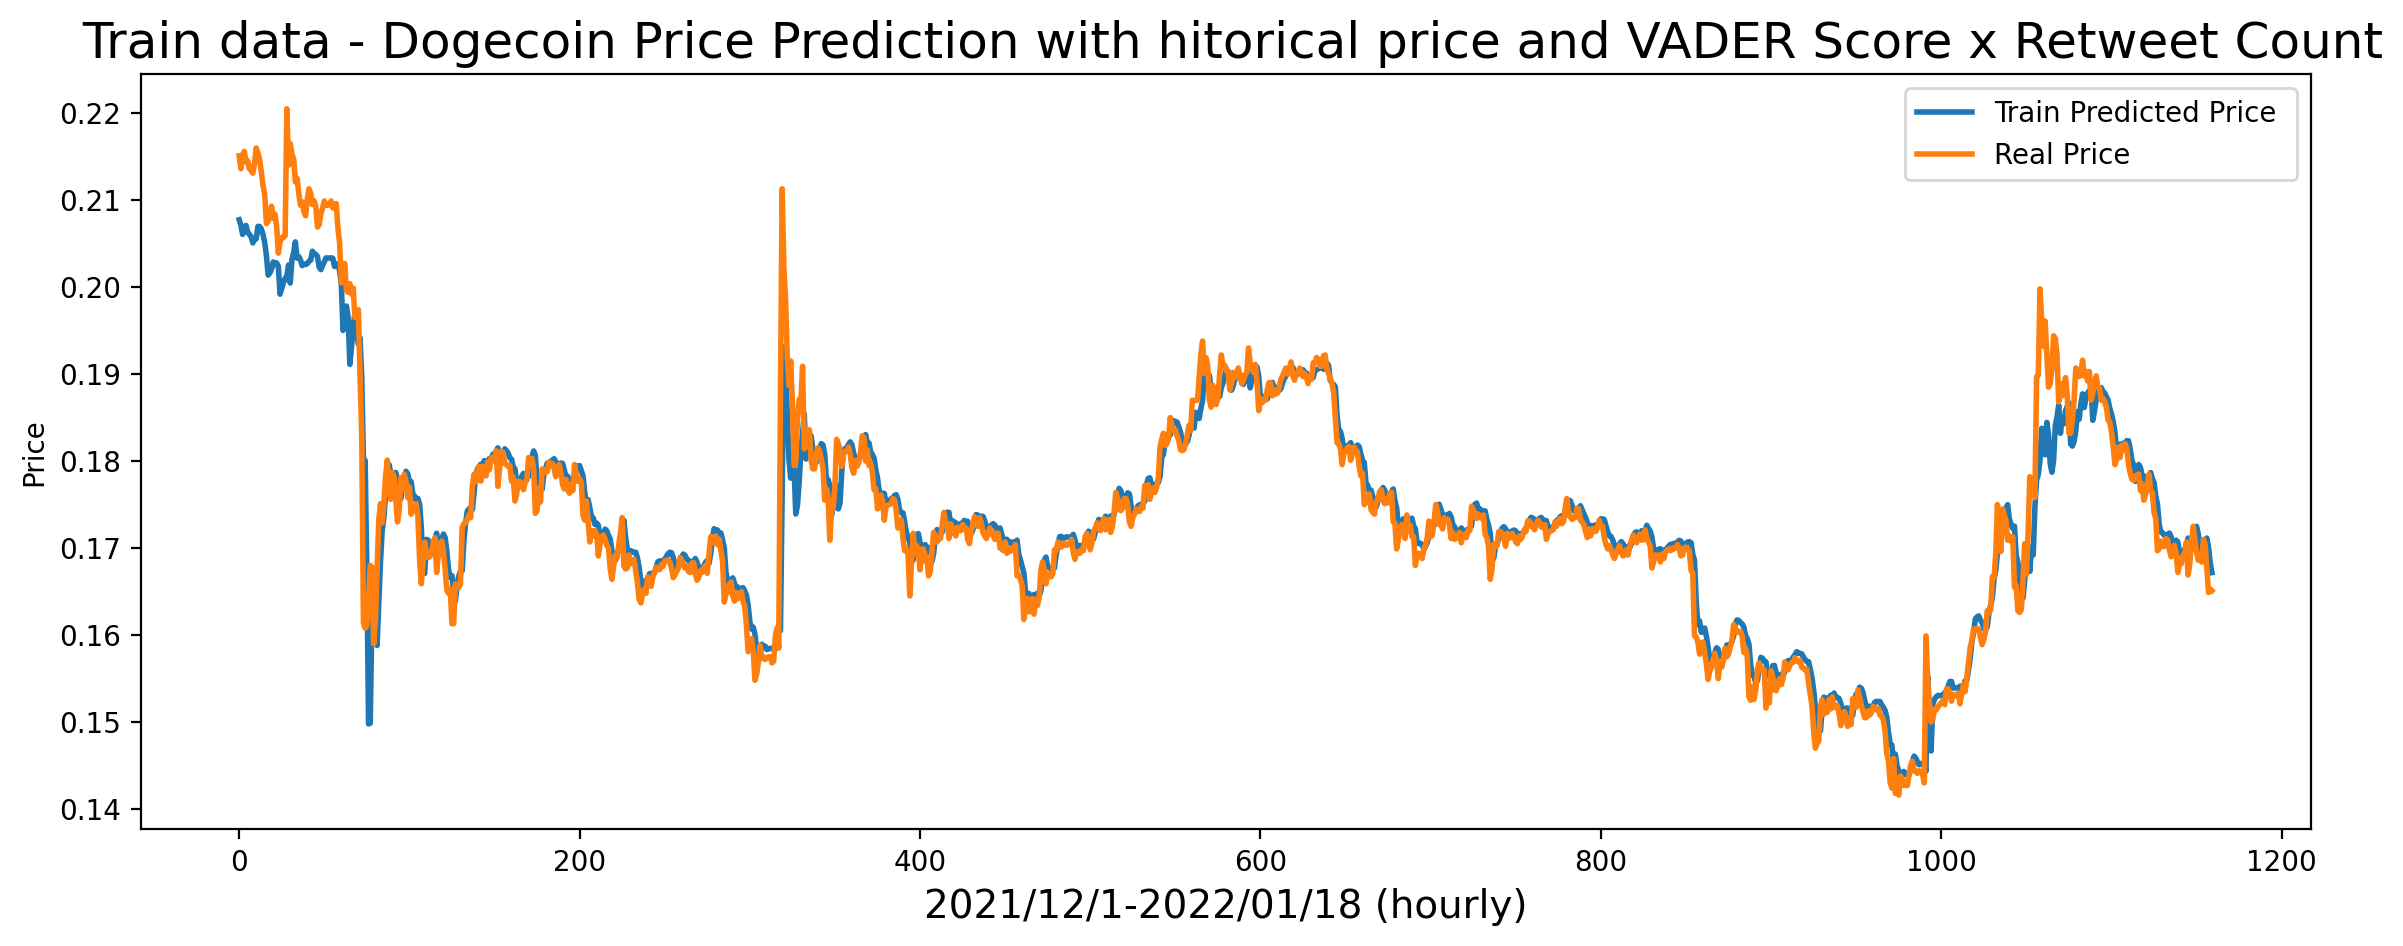

0.0035240407084546808

In [74]:
plot_predictions5(model5,X5_train,y5_train)

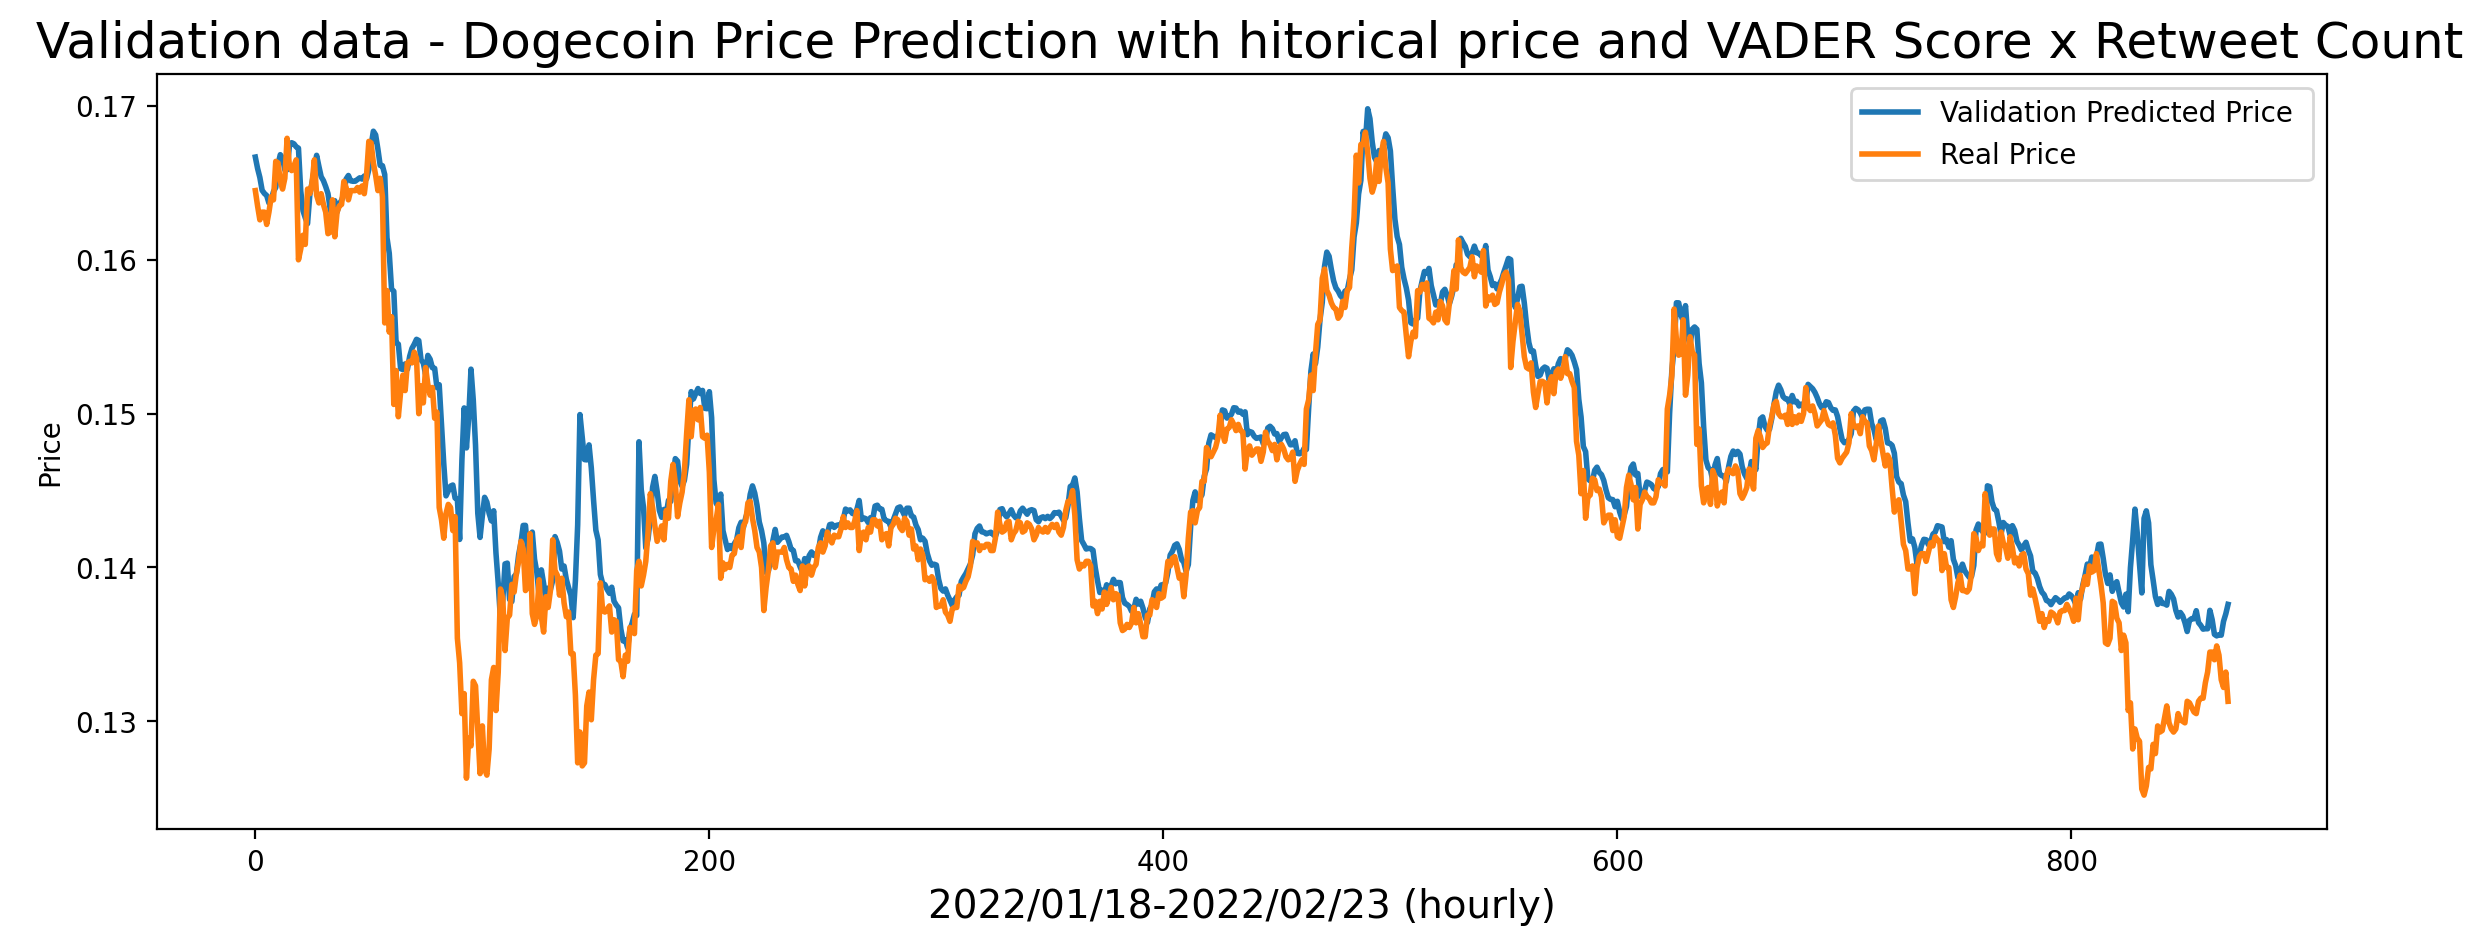

0.00396842409059664

In [76]:
plot_predictions5(model5,X5_val,y5_val,partofdata='Validation')

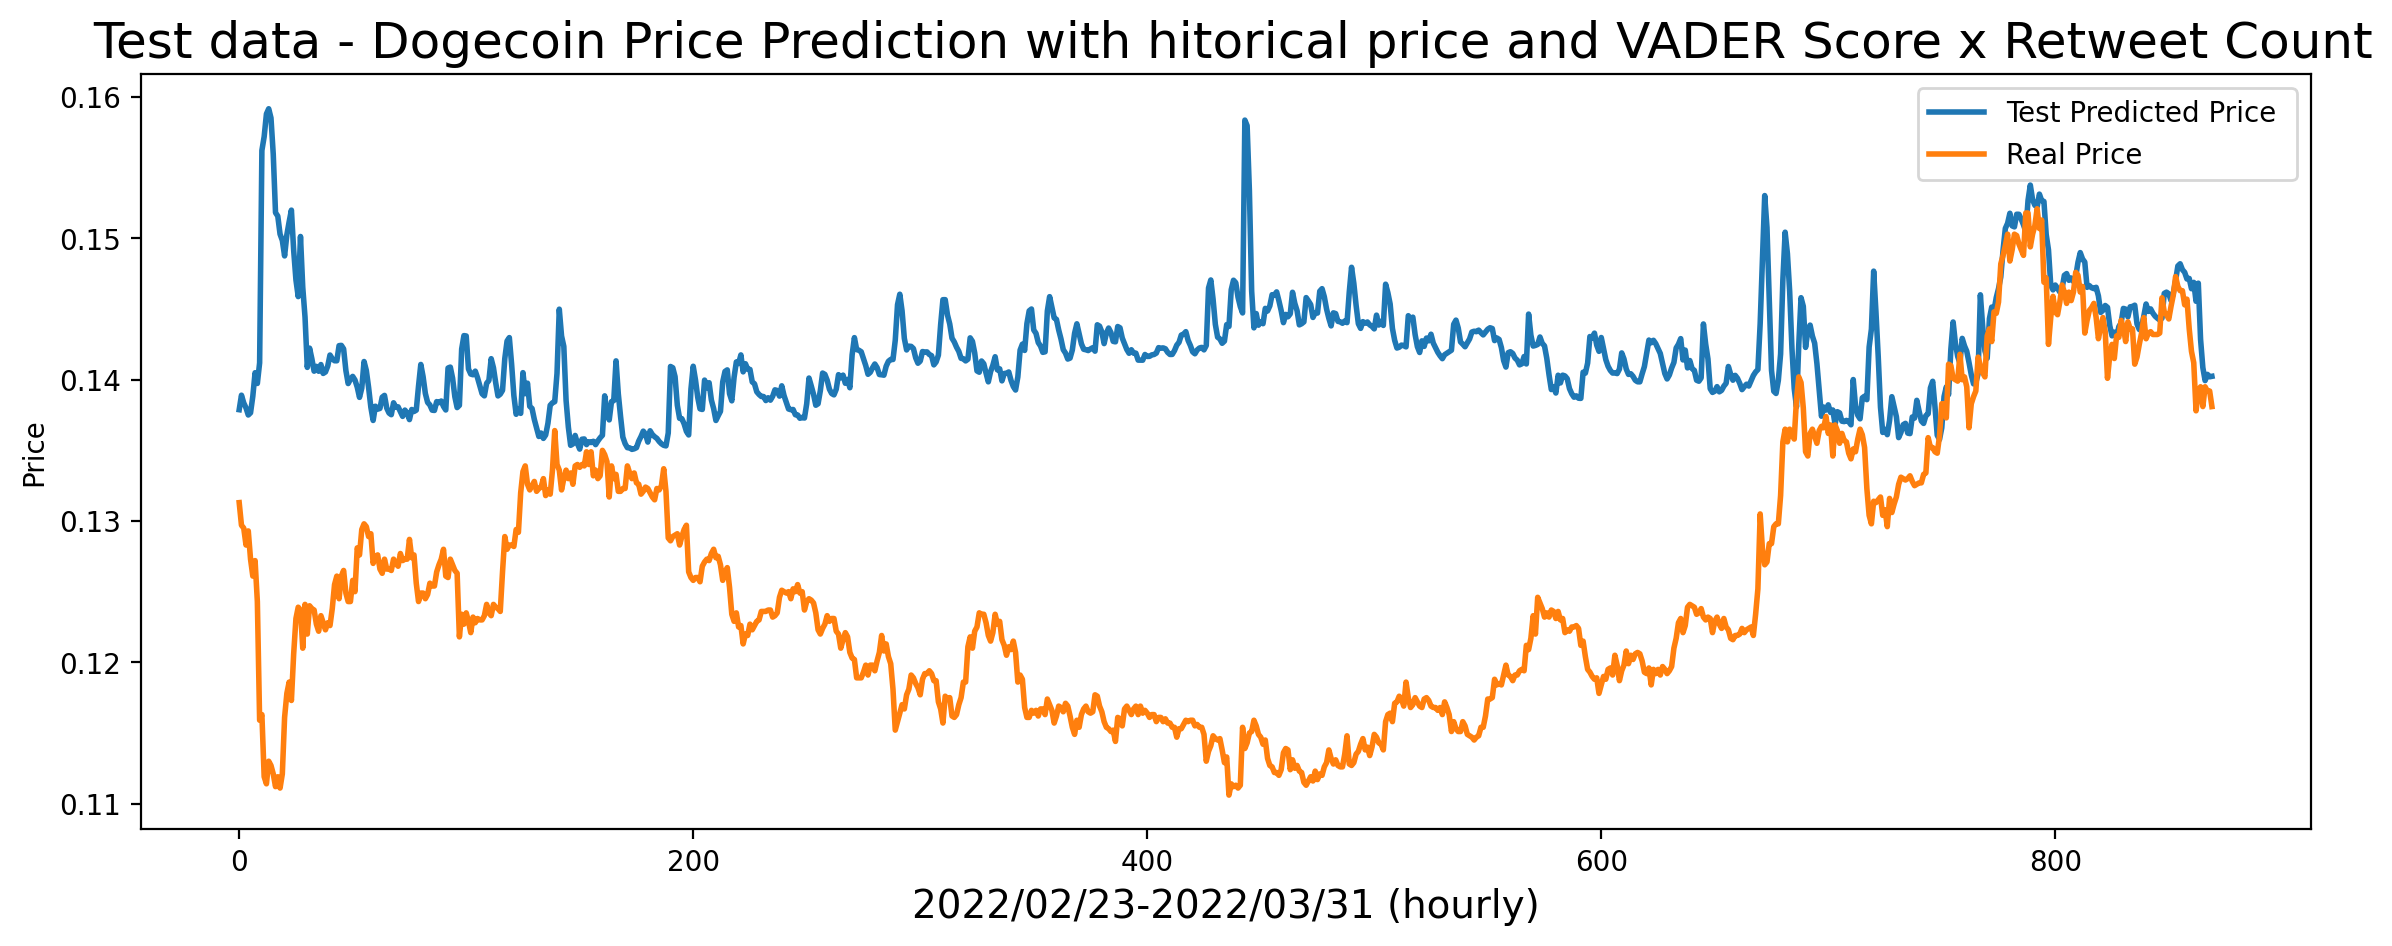

0.019455587341812557

In [75]:
plot_predictions5(model5,X5_test,y5_test,partofdata='Test')

In [ ]:
# TextBLob + 

In [77]:
temp = df['score_TextBlob']

In [79]:
X6, y6 = df_to_X_y(temp,window_size=3)
X6.shape, y6.shape

((2900, 3, 1), (2900,))

In [80]:
X6_train, y6_train = X6[:1160], y6[:1160]
X6_val, y6_val = X6[1160:2030], y6[1160:2030]
X6_test, y6_test = X6[2030:], y6[2030:]
X6_train.shape, y6_train.shape, X6_val.shape, y6_val.shape, X6_test.shape, y6_test.shape


((1160, 3, 1), (1160,), (870, 3, 1), (870,), (870, 3, 1), (870,))

In [81]:
temp_training_mean = np.mean(X6_train[:, :, 0])
temp_training_std = np.std(X6_train[:, :, 0])

                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
   
    return X

preprocess(X6_train)
preprocess(X6_val)
preprocess(X6_test)

array([[[ 0.83006109],
        [ 0.33399915],
        [-0.1836339 ]],

       [[ 0.33399915],
        [-0.1836339 ],
        [-0.12697772]],

       [[-0.1836339 ],
        [-0.12697772],
        [-0.0469845 ]],

       ...,

       [[-0.18164231],
        [ 0.20498958],
        [-0.16452526]],

       [[ 0.20498958],
        [-0.16452526],
        [ 0.10800289]],

       [[-0.16452526],
        [ 0.10800289],
        [ 1.18752915]]])

In [84]:
model6 = Sequential()
model6.add(InputLayer((3, 1)))
model6.add(LSTM(64))
model6.add(Dropout(0.5))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))

model6.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_22 (Dense)            (None, 8)                 520       
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [85]:
cp6 = ModelCheckpoint('model6/', save_best_only=True)
model6.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model6.fit(X6_train, y6_train, validation_data=(X6_val, y6_val), epochs=10, callbacks=[cp6])

Epoch 1/10
 1/37 [..............................] - ETA: 19s - loss: 0.0218 - root_mean_squared_error: 0.1476

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 2s 35ms/step - loss: 0.0025 - root_mean_squared_error: 0.0503 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0333
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0336
Epoch 3/10
 1/37 [..............................] - ETA: 0s - loss: 9.8352e-04 - root_mean_squared_error: 0.0314

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 1s 28ms/step - loss: 0.0010 - root_mean_squared_error: 0.0319 - val_loss: 8.5336e-04 - val_root_mean_squared_error: 0.0292
Epoch 4/10
 1/37 [..............................] - ETA: 0s - loss: 4.6714e-04 - root_mean_squared_error: 0.0216

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 1s 27ms/step - loss: 8.1760e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.4609e-04 - val_root_mean_squared_error: 0.0291
Epoch 5/10
 1/37 [..............................] - ETA: 0s - loss: 8.2675e-04 - root_mean_squared_error: 0.0288

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 1s 35ms/step - loss: 7.9731e-04 - root_mean_squared_error: 0.0282 - val_loss: 8.3886e-04 - val_root_mean_squared_error: 0.0290
Epoch 6/10
34/37 [==========================>...] - ETA: 0s - loss: 8.1925e-04 - root_mean_squared_error: 0.0286

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 1s 28ms/step - loss: 8.1870e-04 - root_mean_squared_error: 0.0286 - val_loss: 8.1955e-04 - val_root_mean_squared_error: 0.0286
Epoch 7/10
 1/37 [..............................] - ETA: 0s - loss: 6.4599e-04 - root_mean_squared_error: 0.0254

INFO:tensorflow:Assets written to: model6/assets


INFO:tensorflow:Assets written to: model6/assets


37/37 [==============================] - 1s 33ms/step - loss: 7.7730e-04 - root_mean_squared_error: 0.0279 - val_loss: 8.0644e-04 - val_root_mean_squared_error: 0.0284
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 7.6671e-04 - root_mean_squared_error: 0.0277 - val_loss: 8.2331e-04 - val_root_mean_squared_error: 0.0287
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 7.4934e-04 - root_mean_squared_error: 0.0274 - val_loss: 8.2419e-04 - val_root_mean_squared_error: 0.0287
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 7.5676e-04 - root_mean_squared_error: 0.0275 - val_loss: 8.6668e-04 - val_root_mean_squared_error: 0.0294


In [95]:
def plot_predictions6(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 3)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction with hitorical price and Score of TextBlob',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

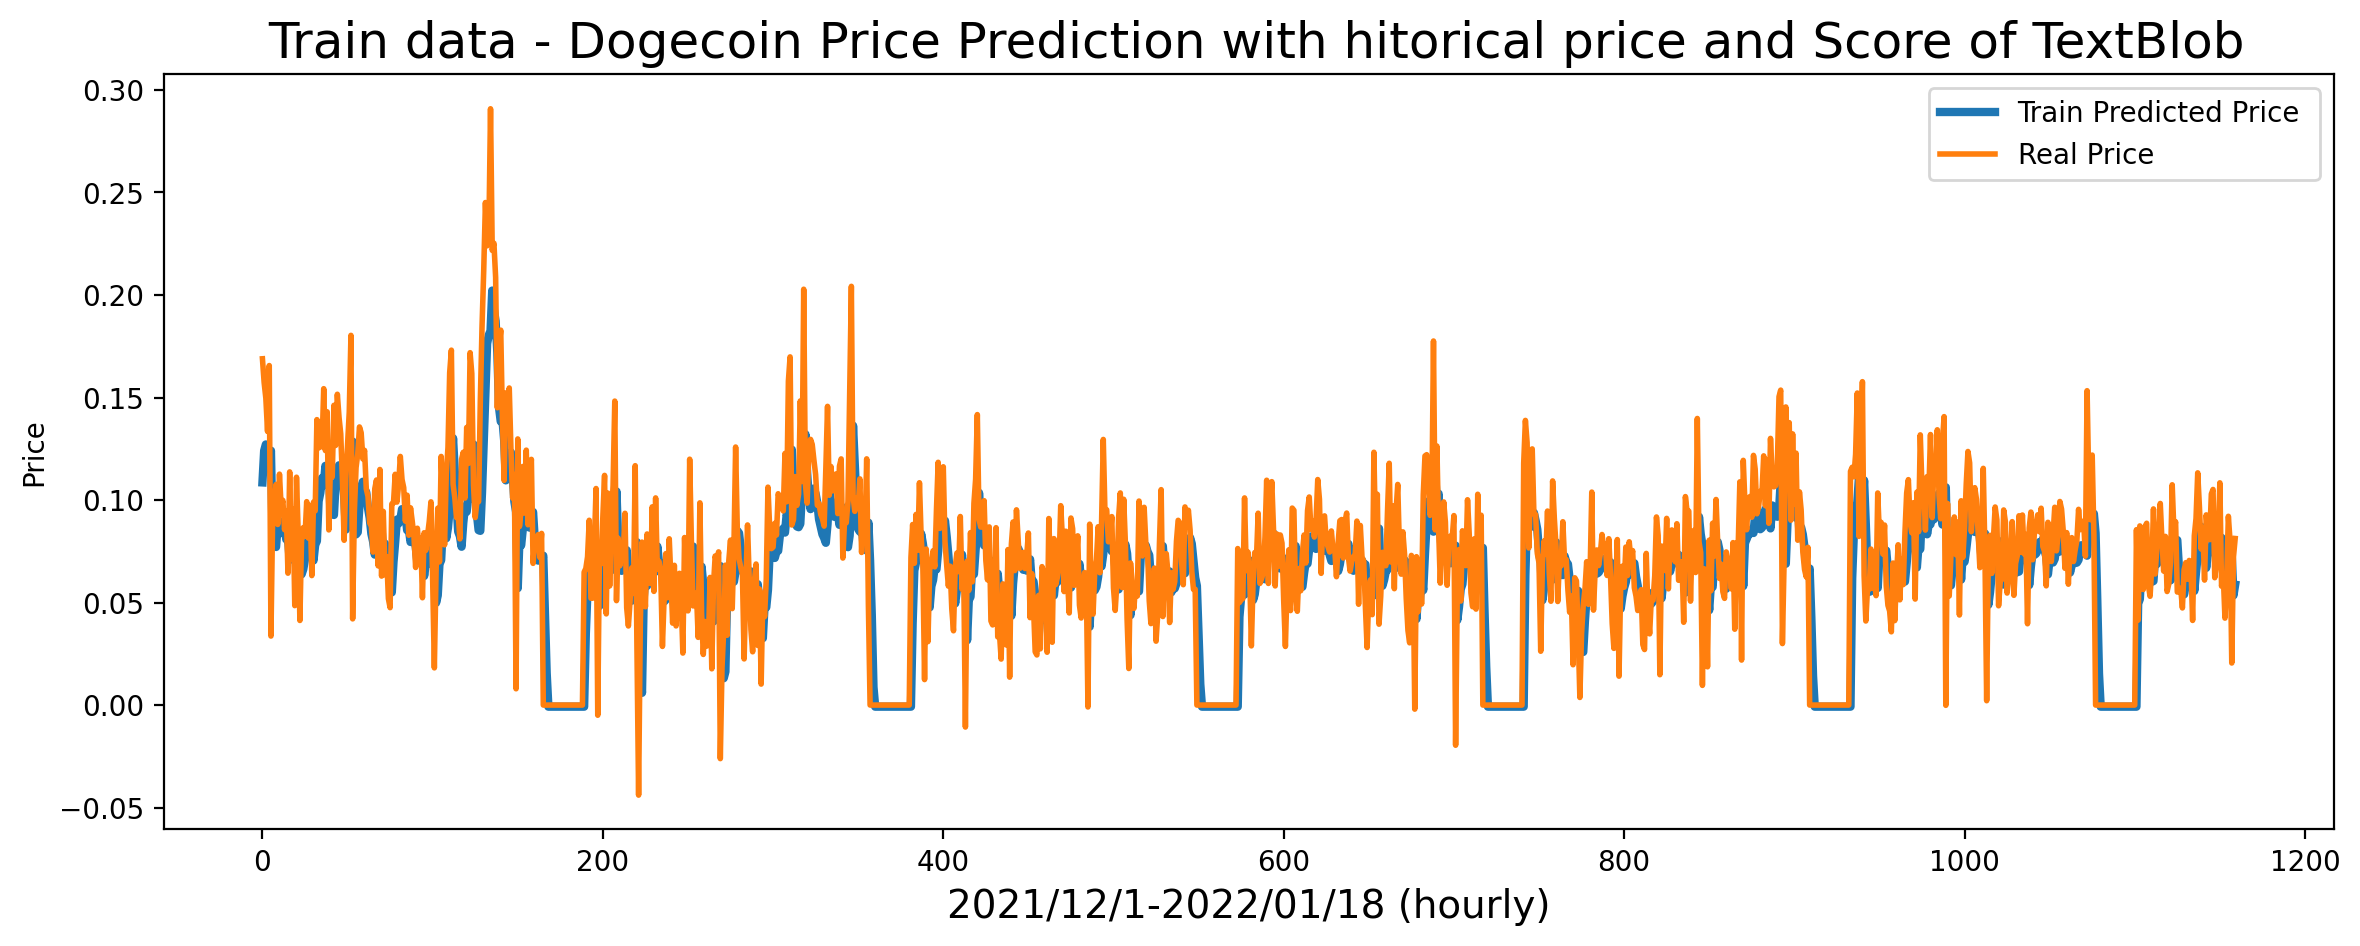

0.02705296218422818

In [96]:
plot_predictions6(model6,X6_train,y6_train)

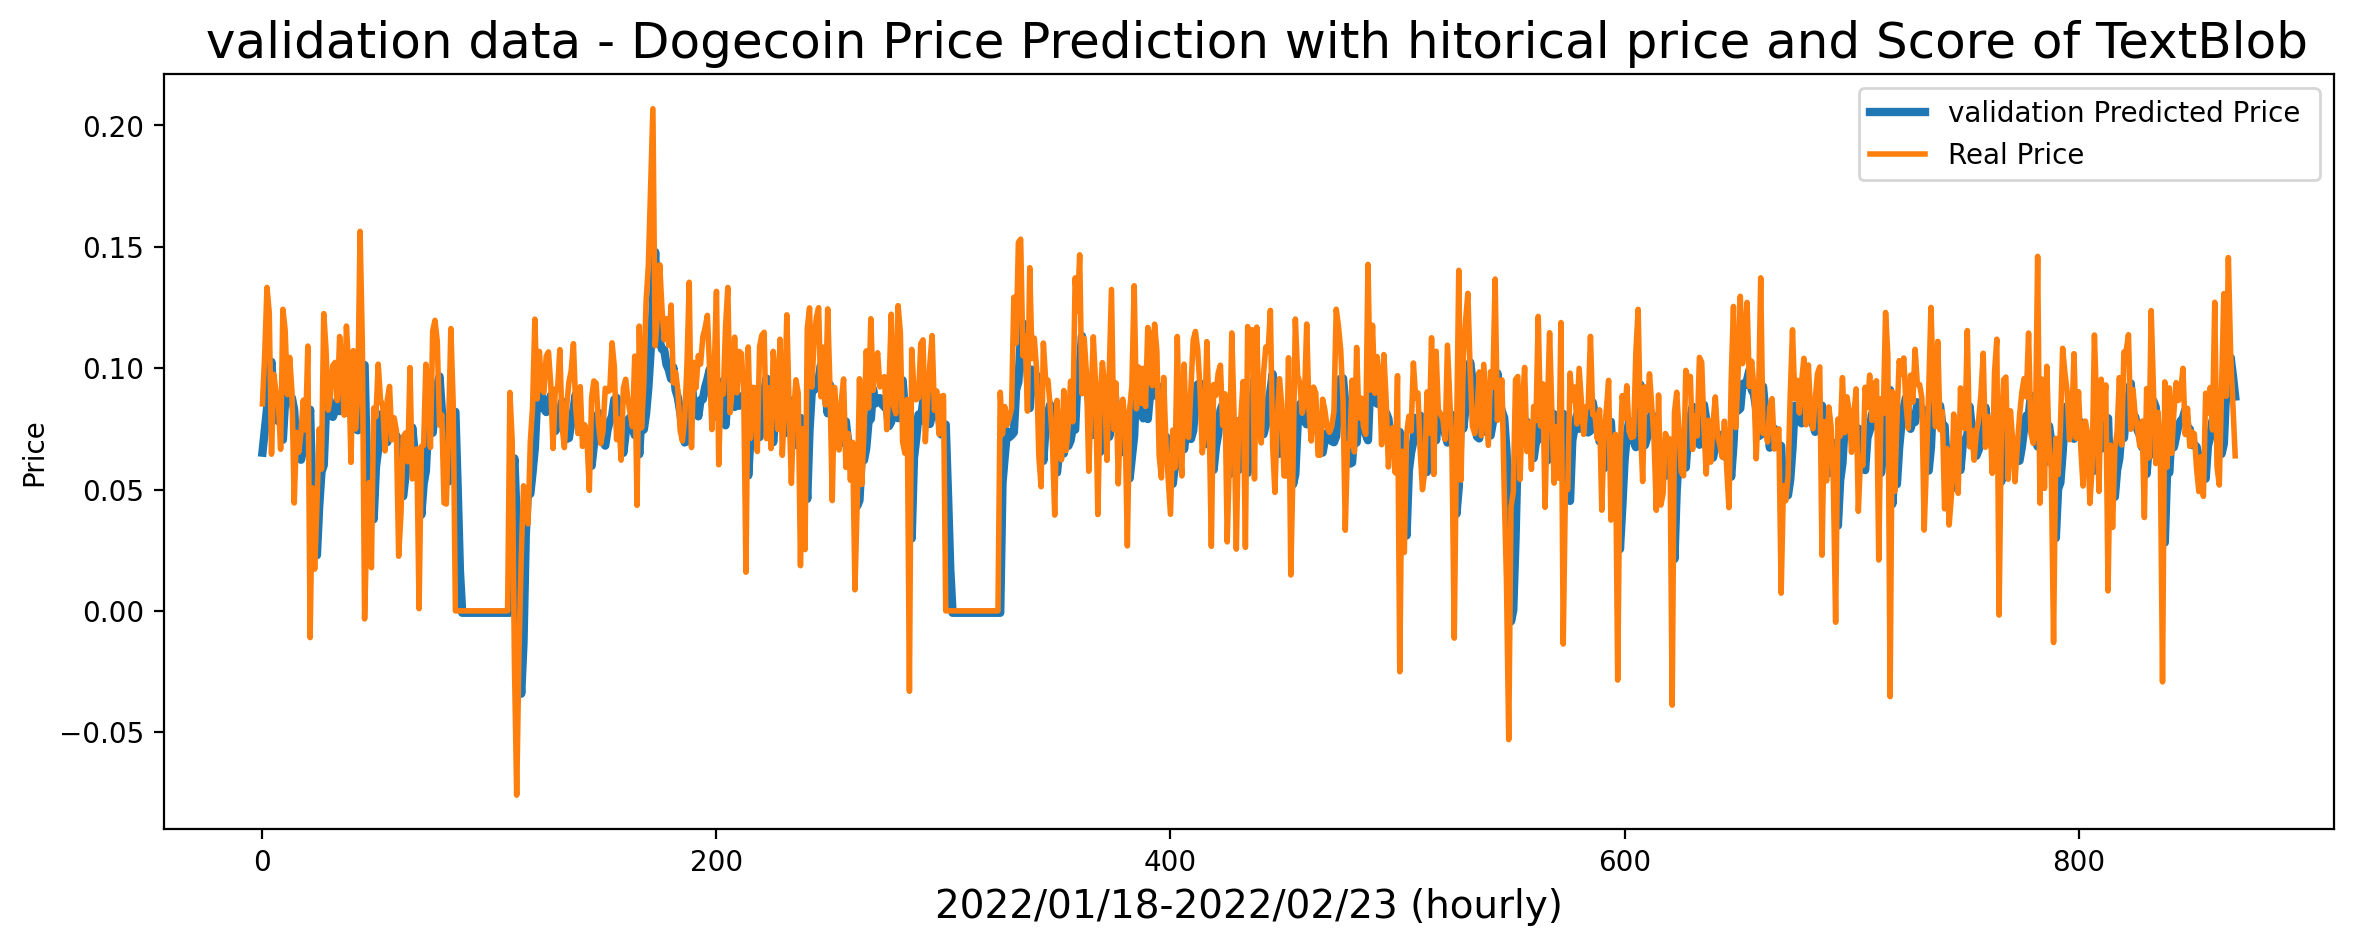

0.029439441540209915

In [97]:
plot_predictions6(model6,X6_val,y6_val,partofdata='validation')

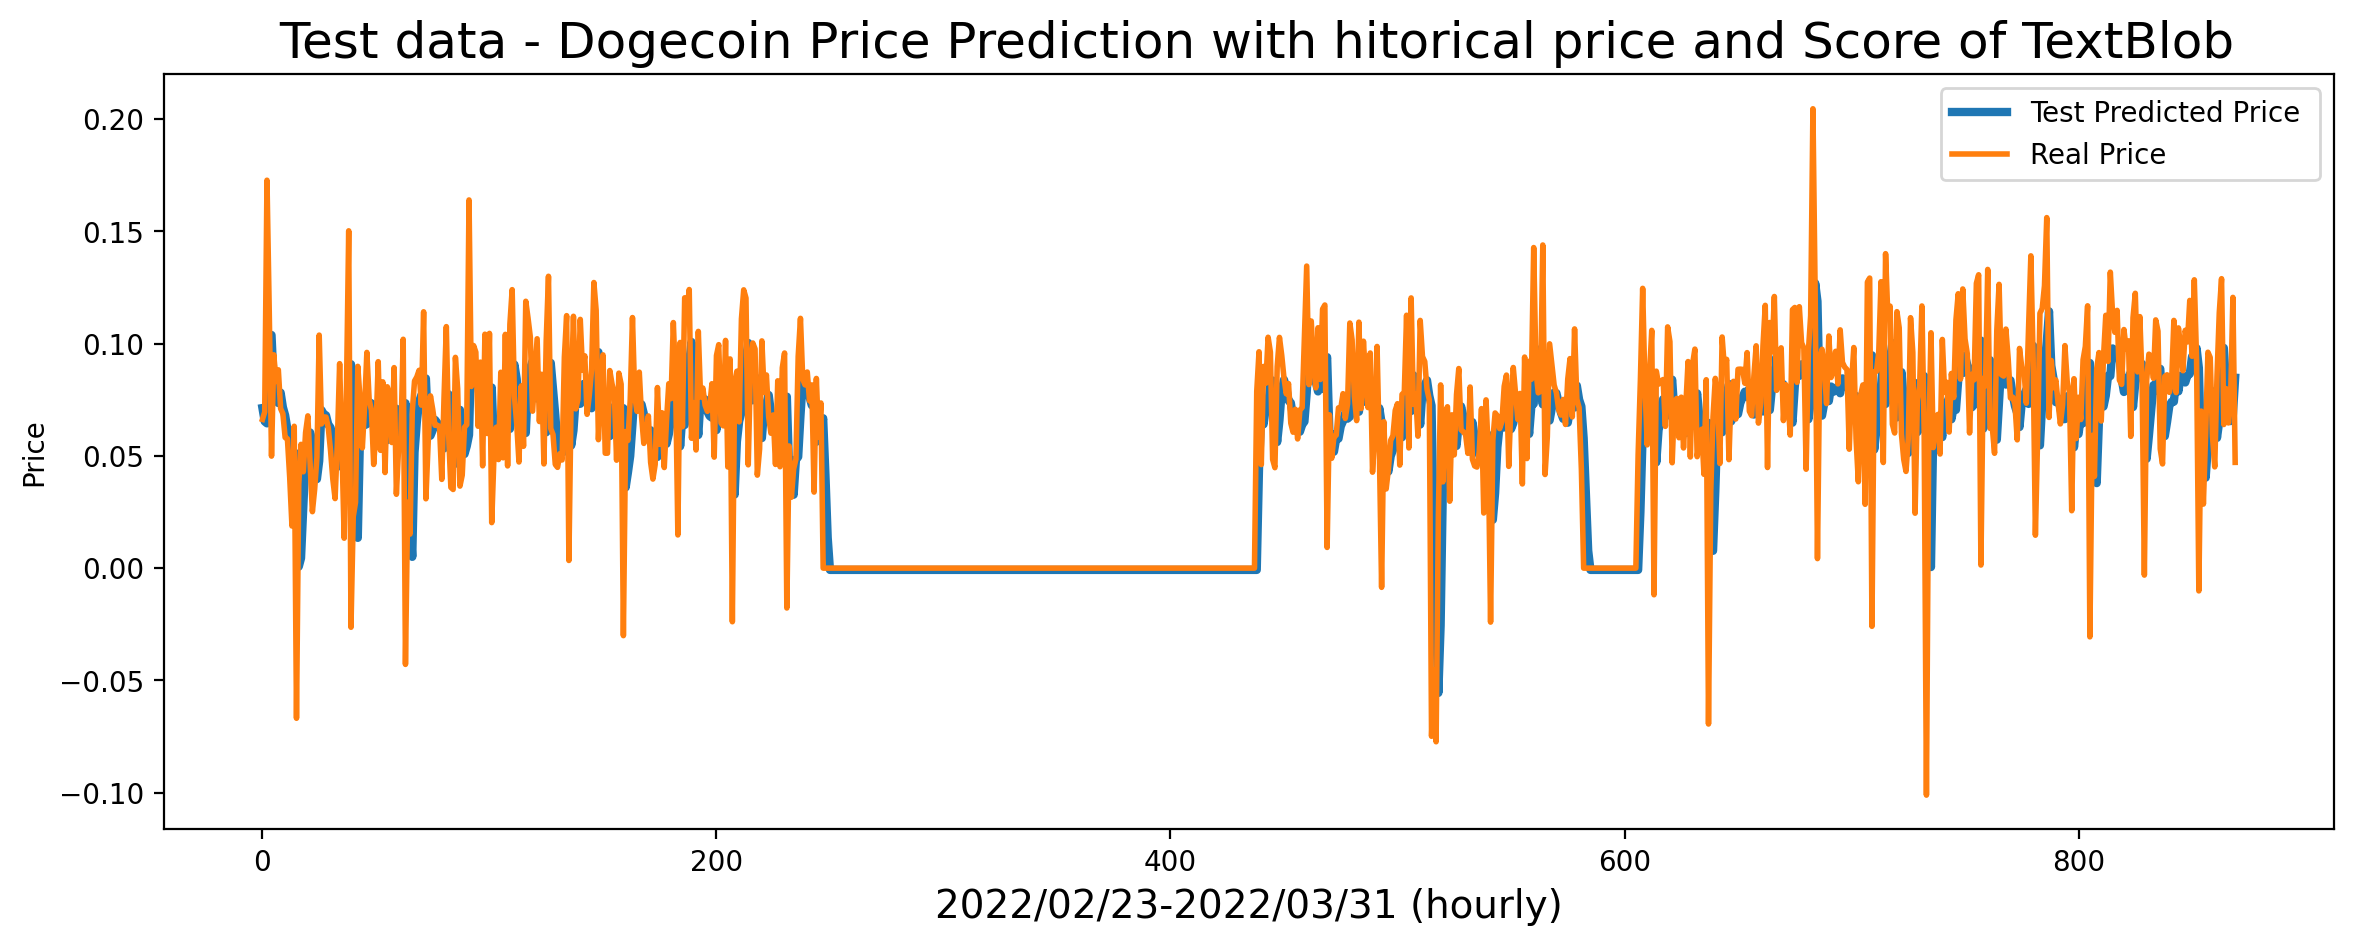

0.03004174080658672

In [98]:
plot_predictions6(model6,X6_test,y6_test,partofdata='Test')

In [99]:
temp=df['compound_NLTK']
X7, y7 = df_to_X_y(temp,window_size=3)
X7.shape, y7.shape

((2900, 3, 1), (2900,))

In [100]:
X7_train, y7_train = X7[:1160], y7[:1160]
X7_val, y7_val = X7[1160:2030], y7[1160:2030]
X7_test, y7_test = X7[2030:], y7[2030:]
X7_train.shape, y7_train.shape, X7_val.shape, y7_val.shape, X7_test.shape, y7_test.shape


((1160, 3, 1), (1160,), (870, 3, 1), (870,), (870, 3, 1), (870,))

In [101]:
temp_training_mean = np.mean(X7_train[:, :, 0])
temp_training_std = np.std(X7_train[:, :, 0])

                           
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
   
    return X

preprocess(X7_train)
preprocess(X7_val)
preprocess(X7_test)

array([[[ 0.06036353],
        [ 0.6018676 ],
        [-0.12631547]],

       [[ 0.6018676 ],
        [-0.12631547],
        [ 0.19495606]],

       [[-0.12631547],
        [ 0.19495606],
        [ 0.96059779]],

       ...,

       [[ 0.24533017],
        [ 1.20993731],
        [-0.87538333]],

       [[ 1.20993731],
        [-0.87538333],
        [-0.02512705]],

       [[-0.87538333],
        [-0.02512705],
        [ 0.69457033]]])

In [102]:
model7 = Sequential()
model7.add(InputLayer((3, 1)))
model7.add(LSTM(64))
model7.add(Dropout(0.5))
model7.add(Dense(8, 'relu'))
model7.add(Dense(1, 'linear'))

model7.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 64)                16896     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_24 (Dense)            (None, 8)                 520       
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [103]:
cp7 = ModelCheckpoint('model7/', save_best_only=True)
model7.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])
model7.fit(X7_train, y7_train, validation_data=(X7_val, y7_val), epochs=10, callbacks=[cp7])

Epoch 1/10
30/37 [=======================>......] - ETA: 0s - loss: 0.0032 - root_mean_squared_error: 0.0562 

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


37/37 [==============================] - 2s 33ms/step - loss: 0.0028 - root_mean_squared_error: 0.0533 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0358 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0452
Epoch 3/10
 1/37 [..............................] - ETA: 0s - loss: 9.7330e-04 - root_mean_squared_error: 0.0312

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


37/37 [==============================] - 1s 37ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0441
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0449
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0450
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0349 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0446
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0353 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0447
Epoch 8/10
 1/37 [..............................] - ETA: 0s - loss: 0.0012 - root_mean_squared_error: 0.0353

INFO:tensorflow:Assets written to: model7/assets


INFO:tensorflow:Assets written to: model7/assets


37/37 [==============================] - 1s 28ms/step - loss: 0.0012 - root_mean_squared_error: 0.0346 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0439
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0345 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444
Epoch 10/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0342 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0444


In [104]:
def plot_predictions7(model, X, y, start=0, end=1200,partofdata = 'Train'):

    predictions = model.predict(X).flatten()
    df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    plt.figure(figsize=(14,5))
    plt.plot(df['Predictions'][start:end],label = f'{partofdata} Predicted Price ',linewidth = 3)
    plt.plot(df['Actuals'][start:end], label = 'Real Price',linewidth = 2)
    plt.title(f' {partofdata} data - Dogecoin Price Prediction along with VADER Compound Score',fontsize = 18)
    if partofdata == 'Train':
        plt.xlabel('2021/12/1-2022/01/18 (hourly)', fontsize = 14)
    elif partofdata =='Test':
         plt.xlabel('2022/02/23-2022/03/31 (hourly)', fontsize = 14)
    else:
        plt.xlabel('2022/01/18-2022/02/23 (hourly)', fontsize = 14)
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    return  mse(y, predictions,squared= False)

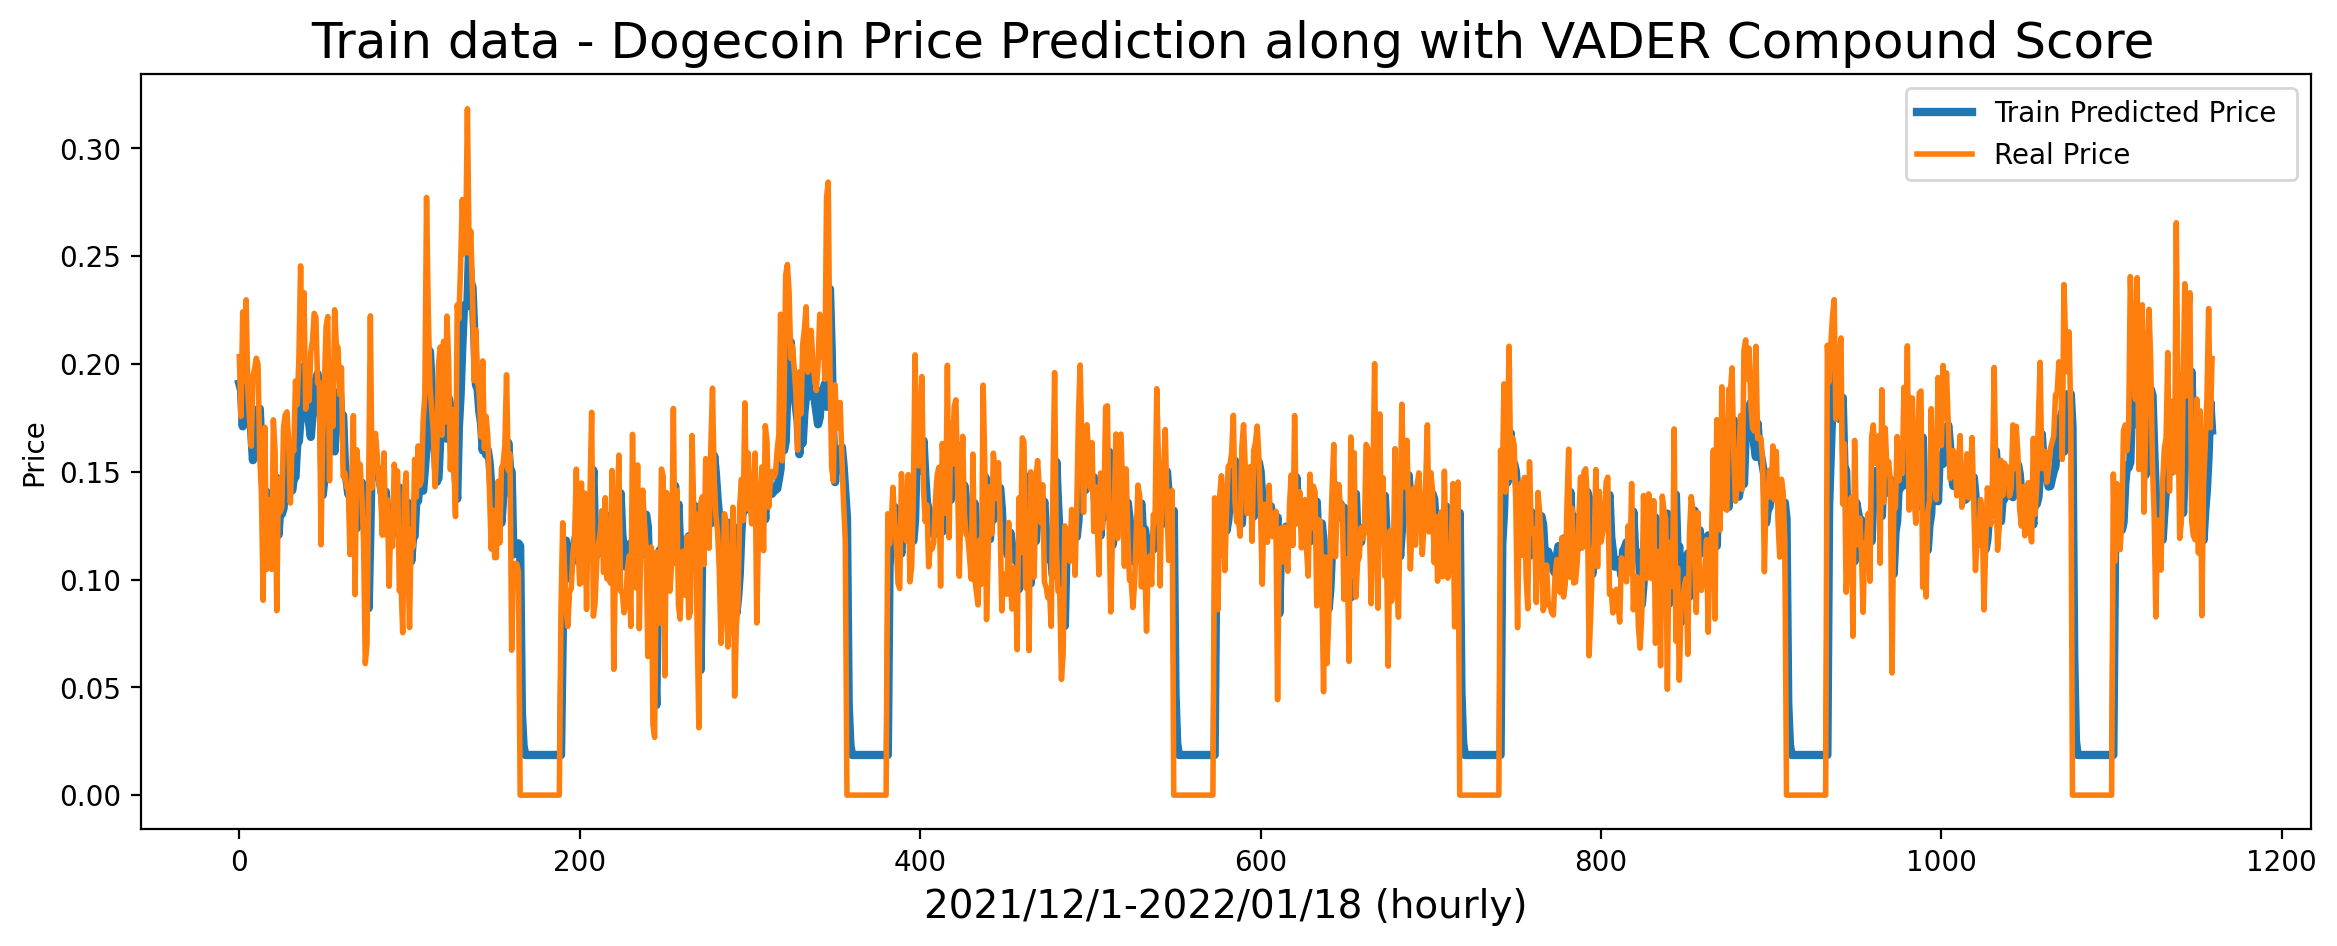

0.03288683000305188

In [105]:
plot_predictions7(model7,X7_train,y7_train)

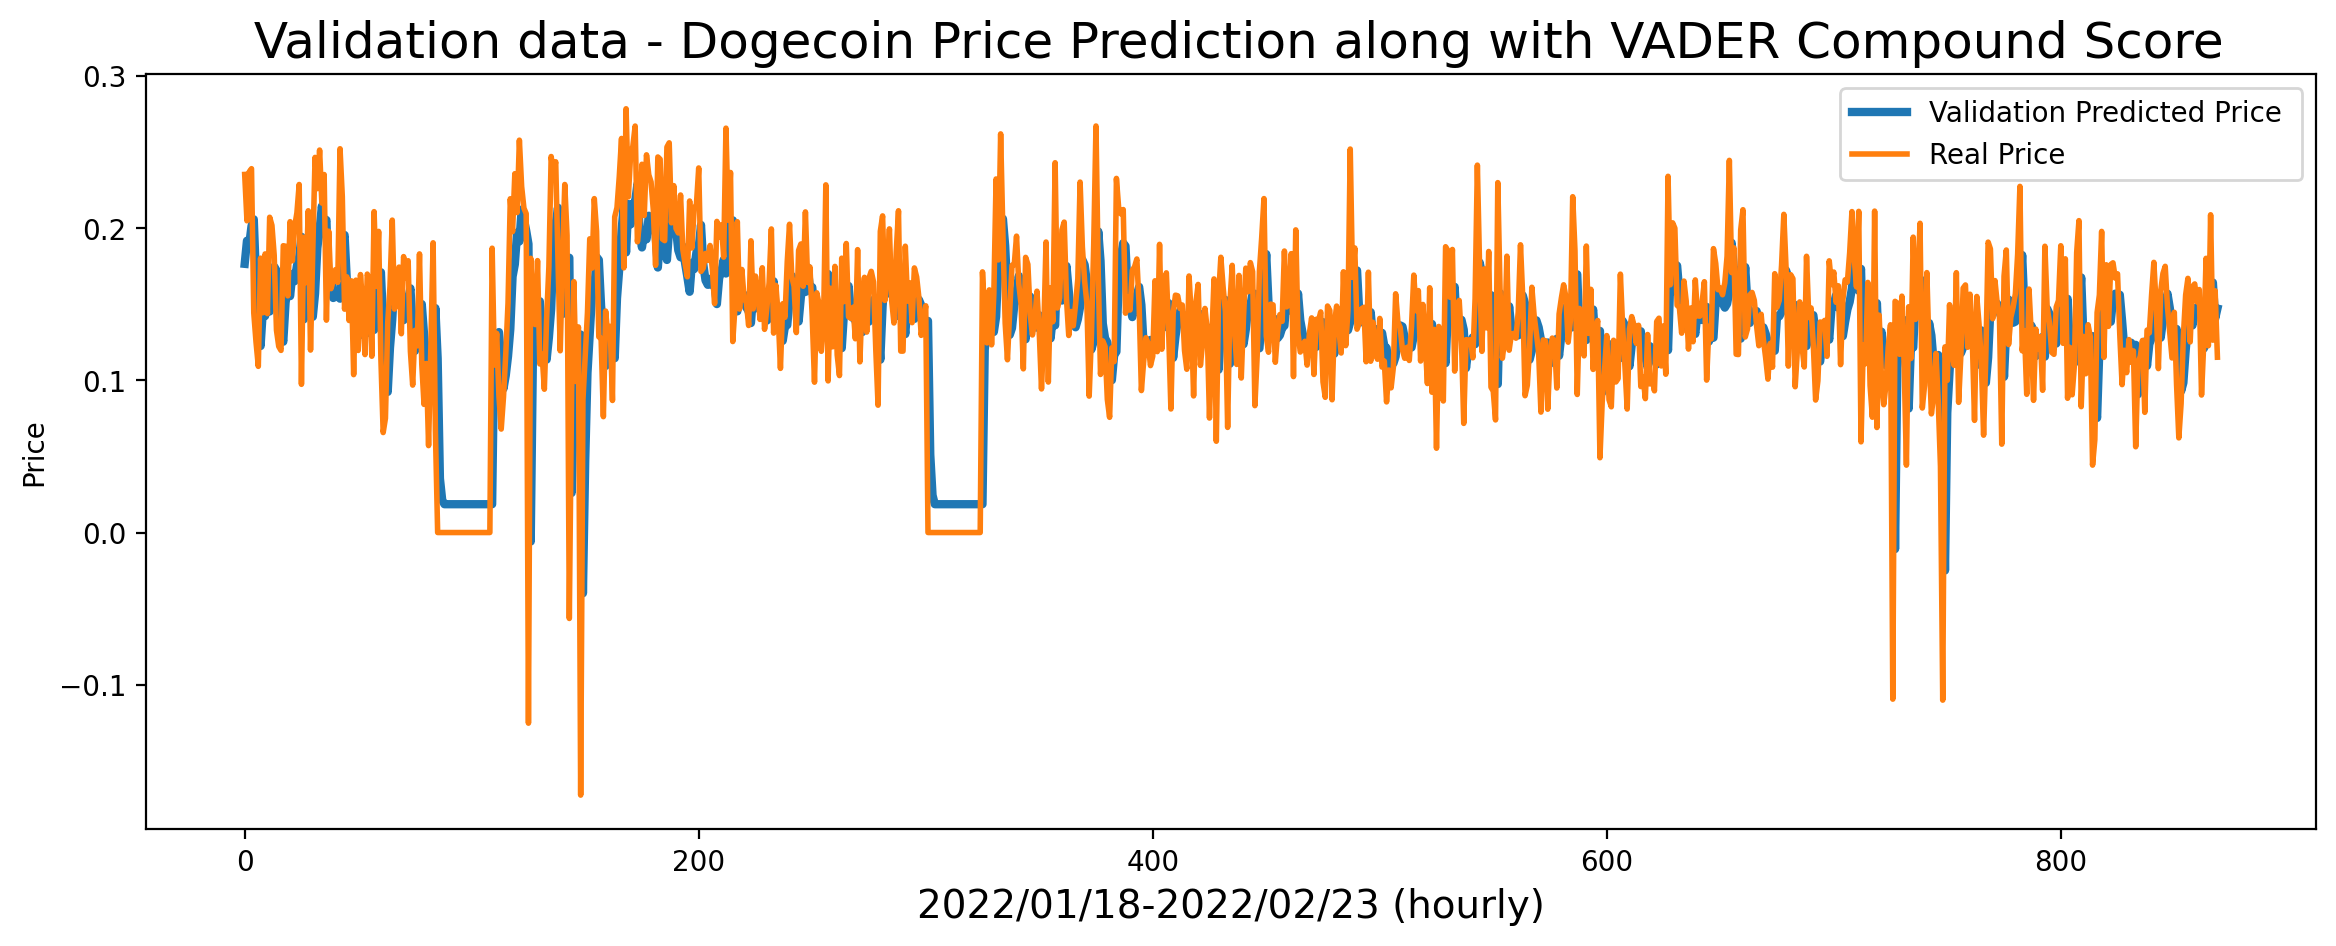

0.044442362509424495

In [106]:
plot_predictions7(model7,X7_val,y7_val,partofdata='Validation')

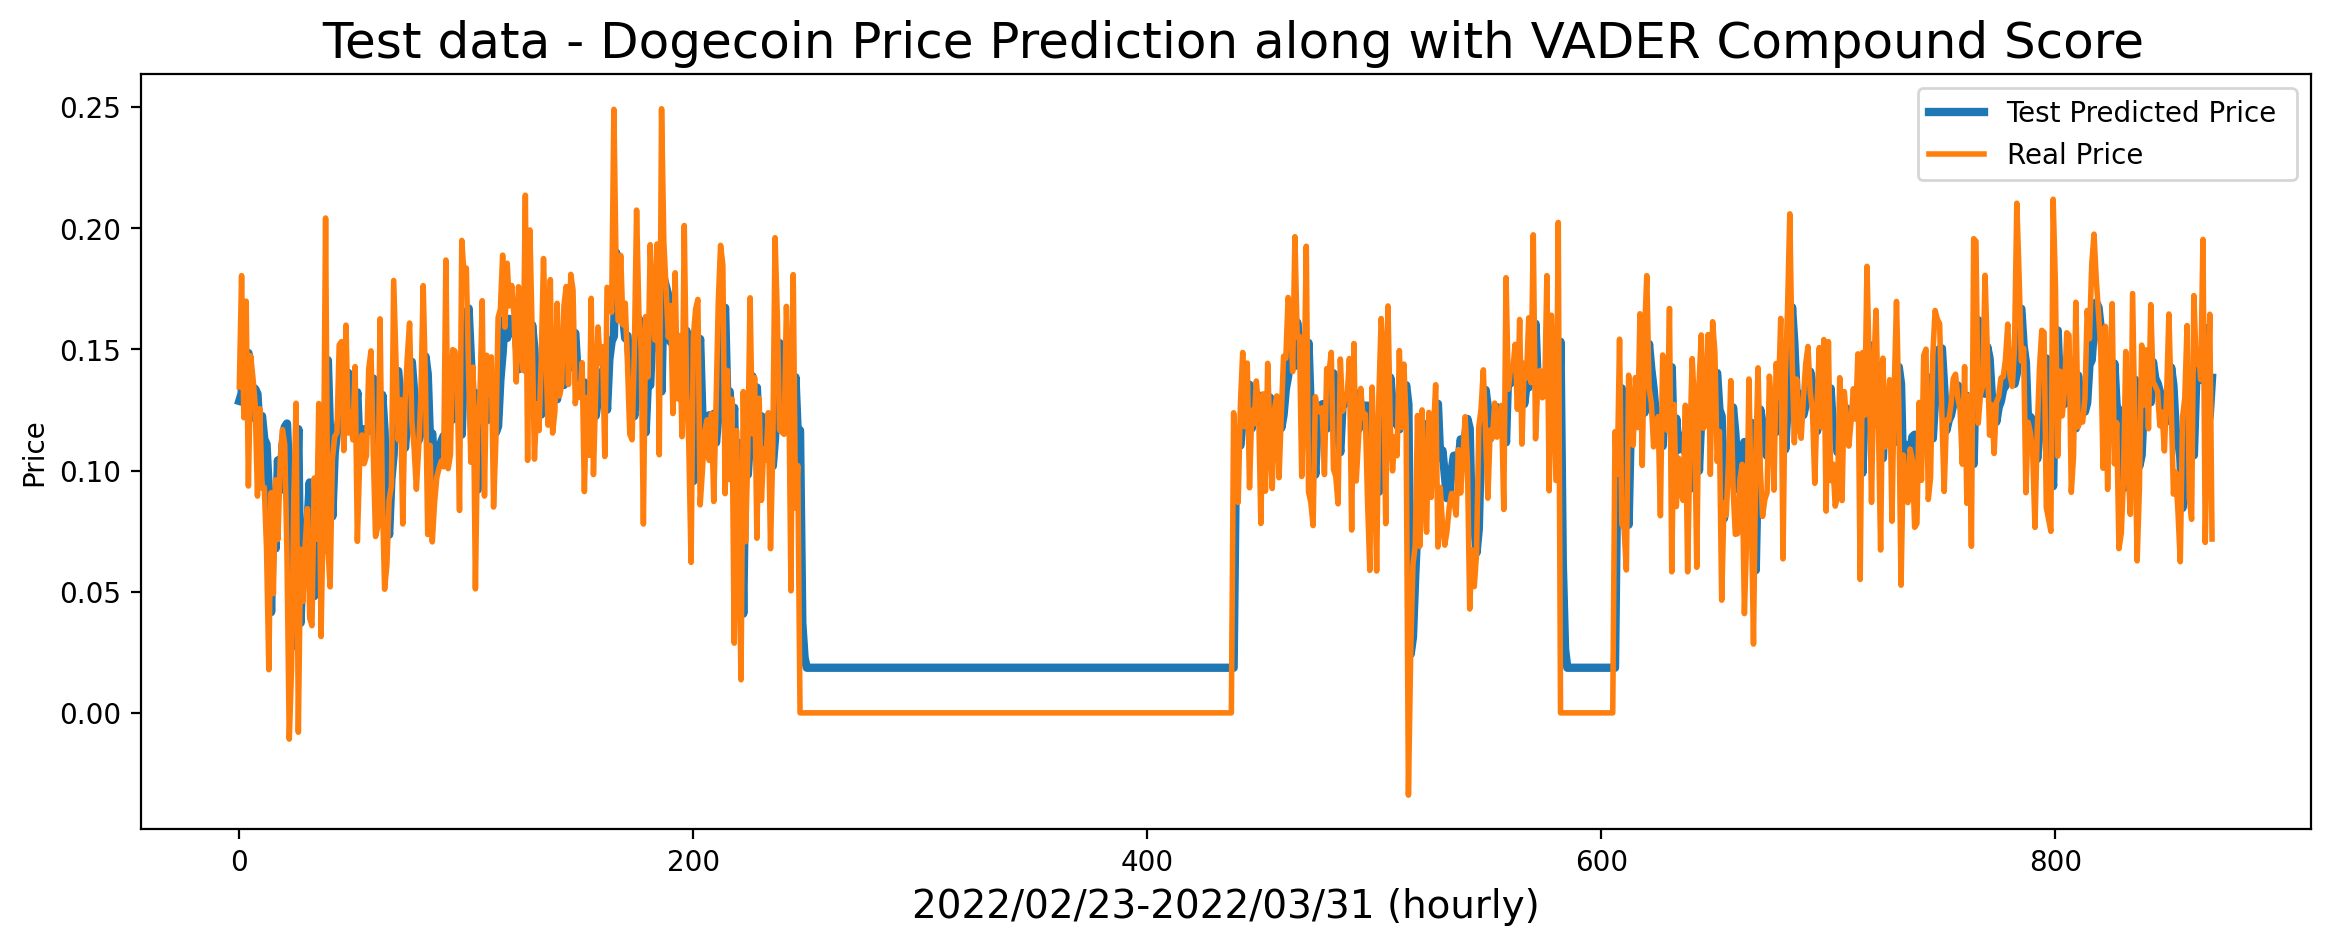

0.03400626003540006

In [107]:
plot_predictions7(model7,X7_test,y7_test,partofdata='Test')